In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_clean_utils
from matplotlib.gridspec import GridSpec
from scipy.stats import chi2_contingency, f_oneway, jarque_bera, probplot
import plotly.express as px
import missingno as msno

In [ ]:
df_uncleaned=pd.read_csv("swiggy.csv")

In [ ]:
df_uncleaned.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [ ]:
df_uncleaned.shape

(45593, 20)

In [ ]:
df_uncleaned.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [ ]:
data_clean_utils.perform_data_cleaning(df_uncleaned)

In [ ]:
df = pd.read_csv("swiggy_cleaned.csv")

In [ ]:
df.shape

(45502, 27)

In [ ]:
df.head(10)

rider_id   age  ratings  restaurant_latitude  \
0    INDORES13DEL02   37.0      4.9            22.745049   
1    BANGRES18DEL02   34.0      4.5            12.913041   
2    BANGRES19DEL01   23.0      4.4            12.914264   
3   COIMBRES13DEL02   38.0      4.7            11.003669   
4    CHENRES12DEL01   32.0      4.6            12.972793   
5     HYDRES09DEL03   22.0      4.8            17.431668   
6  RANCHIRES15DEL01   33.0      4.7            23.369746   
7     MYSRES15DEL02   35.0      4.6            12.352058   
8     HYDRES05DEL02   22.0      4.8            17.433809   
9     DEHRES17DEL01   36.0      4.2            30.327968   

   restaurant_longitude  delivery_latitude  delivery_longitude  order_date  \
0             75.892471          22.765049           75.912471  2022-03-19   
1             77.683237          13.043041           77.813237  2022-03-25   
2             77.678400          12.924264           77.688400  2022-03-19   
3             76.976494          11.053669           77.026494  2022-04-05   
4             80.249982          13.012793           80.289982  2022-03-26   
5             78.408321          17.461668           78.438321  2022-03-11   
6             85.339820          23.479746           85.449820  2022-03-04   
7             76.606650          12.482058           76.736650  2022-03-14   
8             78.386744          17.563809           78.516744  2022-03-20   
9             78.046106          30.397968           78.116106  2022-02-12   

      weather traffic  ...  city_name order_day order_month  \
0       sunny    high  ...       INDO        19           3   
1      stormy     jam  ...       BANG        25           3   
2  sandstorms     low  ...       BANG        19           3   
3       sunny  medium  ...      COIMB         5           4   
4      cloudy    high  ...       CHEN        26           3   
5      cloudy     jam  ...        HYD        11           3   
6         fog     jam  ...     RANCHI         4           3   
7      cloudy  medium  ...        MYS        14           3   
8      stormy     jam  ...        HYD        20           3   
9         fog     jam  ...        DEH        12           2   

   order_day_of_week is_weekend pickup_time_minutes  order_time_hour  \
0           saturday          1                15.0             11.0   
1             friday          0                 5.0             19.0   
2           saturday          1                15.0              8.0   
3            tuesday          0                10.0             18.0   
4           saturday          1                15.0             13.0   
5             friday          0                10.0             21.0   
6             friday          0                15.0             19.0   
7             monday          0                 5.0             17.0   
8             sunday          1                10.0             20.0   
9           saturday          1                15.0             21.0   

  order_time_of_day   distance  distance_type  
0           morning   3.025149          short  
1           evening  20.183530      very_long  
2           morning   1.552758          short  
3           evening   7.790401         medium  
4         afternoon   6.210138         medium  
5             night   4.610365          short  
6           evening  16.600361      very_long  
7         afternoon  20.205253      very_long  
8           evening  19.975520      very_long  
9             night  10.280582           long  

[10 rows x 27 columns]

#PRELIMINARY ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [ ]:
df.isnull().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_of_day       2070
distance                3630
distance_type           3630
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
num_cols = df.columns[[1,2,3,4,5,6,16,22,25]].tolist()
cat_cols = [col for col in df.columns.tolist() if col not in num_cols]
print(f'There are {len(num_cols)} numerical columns and {len(cat_cols)} categorical columns in the data.')

There are 9 numerical columns and 18 categorical columns in the data.


In [ ]:
num_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'pickup_time_minutes',
 'distance']

In [ ]:
cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_of_day',
 'distance_type']

In [ ]:
df[num_cols].describe()

age       ratings  restaurant_latitude  restaurant_longitude  \
count  43648.000000  43594.000000         41872.000000          41872.000000   
mean      29.555008      4.635287            18.913696             76.921664   
std        5.761482      0.313827             5.467265              3.503107   
min       20.000000      2.500000             9.957144             72.768726   
25%       25.000000      4.500000            12.986047             73.897902   
50%       30.000000      4.700000            19.065838             76.618203   
75%       35.000000      4.900000            22.751234             78.368855   
max       39.000000      5.000000            30.914057             88.433452   

       delivery_latitude  delivery_longitude    time_taken  \
count       41872.000000        41872.000000  45502.000000   
mean           18.977356           76.985325     26.297591   
std             5.469056            3.503260      9.386419   
min             9.967144           72.778726     10.000000   
25%            13.065996           73.940327     19.000000   
50%            19.124049           76.662620     26.000000   
75%            22.820040           78.405467     32.000000   
max            31.054057           88.563452     54.000000   

       pickup_time_minutes      distance  
count         43862.000000  41872.000000  
mean              9.989399      9.719296  
std               4.087516      5.602890  
min               5.000000      1.465067  
25%               5.000000      4.657655  
50%              10.000000      9.193014  
75%              15.000000     13.680920  
max              15.000000     20.969489

In [ ]:
df.assign(**{col: df[col].astype("object") for col in cat_cols}).describe(include="object").T

count unique              top     freq
rider_id               45502   1320  PUNERES01DEL01        67
order_date             45502     44       2022-03-15     1190
weather                44977      6              fog     7654
traffic                44992      4              low    15477
vehicle_condition      45502      4                2    15034
type_of_order          45502      4            snack    11512
type_of_vehicle        45502      4       motorcycle    26427
multiple_deliveries  44509.0    4.0              1.0  28109.0
festival               45274      2               no    44380
city_type              44304      3    metropolitian    34029
city_name              45502     22              JAP     3439
order_day              45502     30                3     2323
order_month            45502      3                3    31919
order_day_of_week      45502      7        wednesday     7077
is_weekend             45502      2                0    32995
order_time_hour      43862.0   17.0             21.0   4686.0
order_time_of_day      43432      4            night    13773
distance_type          41872      4           medium    11288

MISSING NUMBER ANALYSIS

<Axes: >

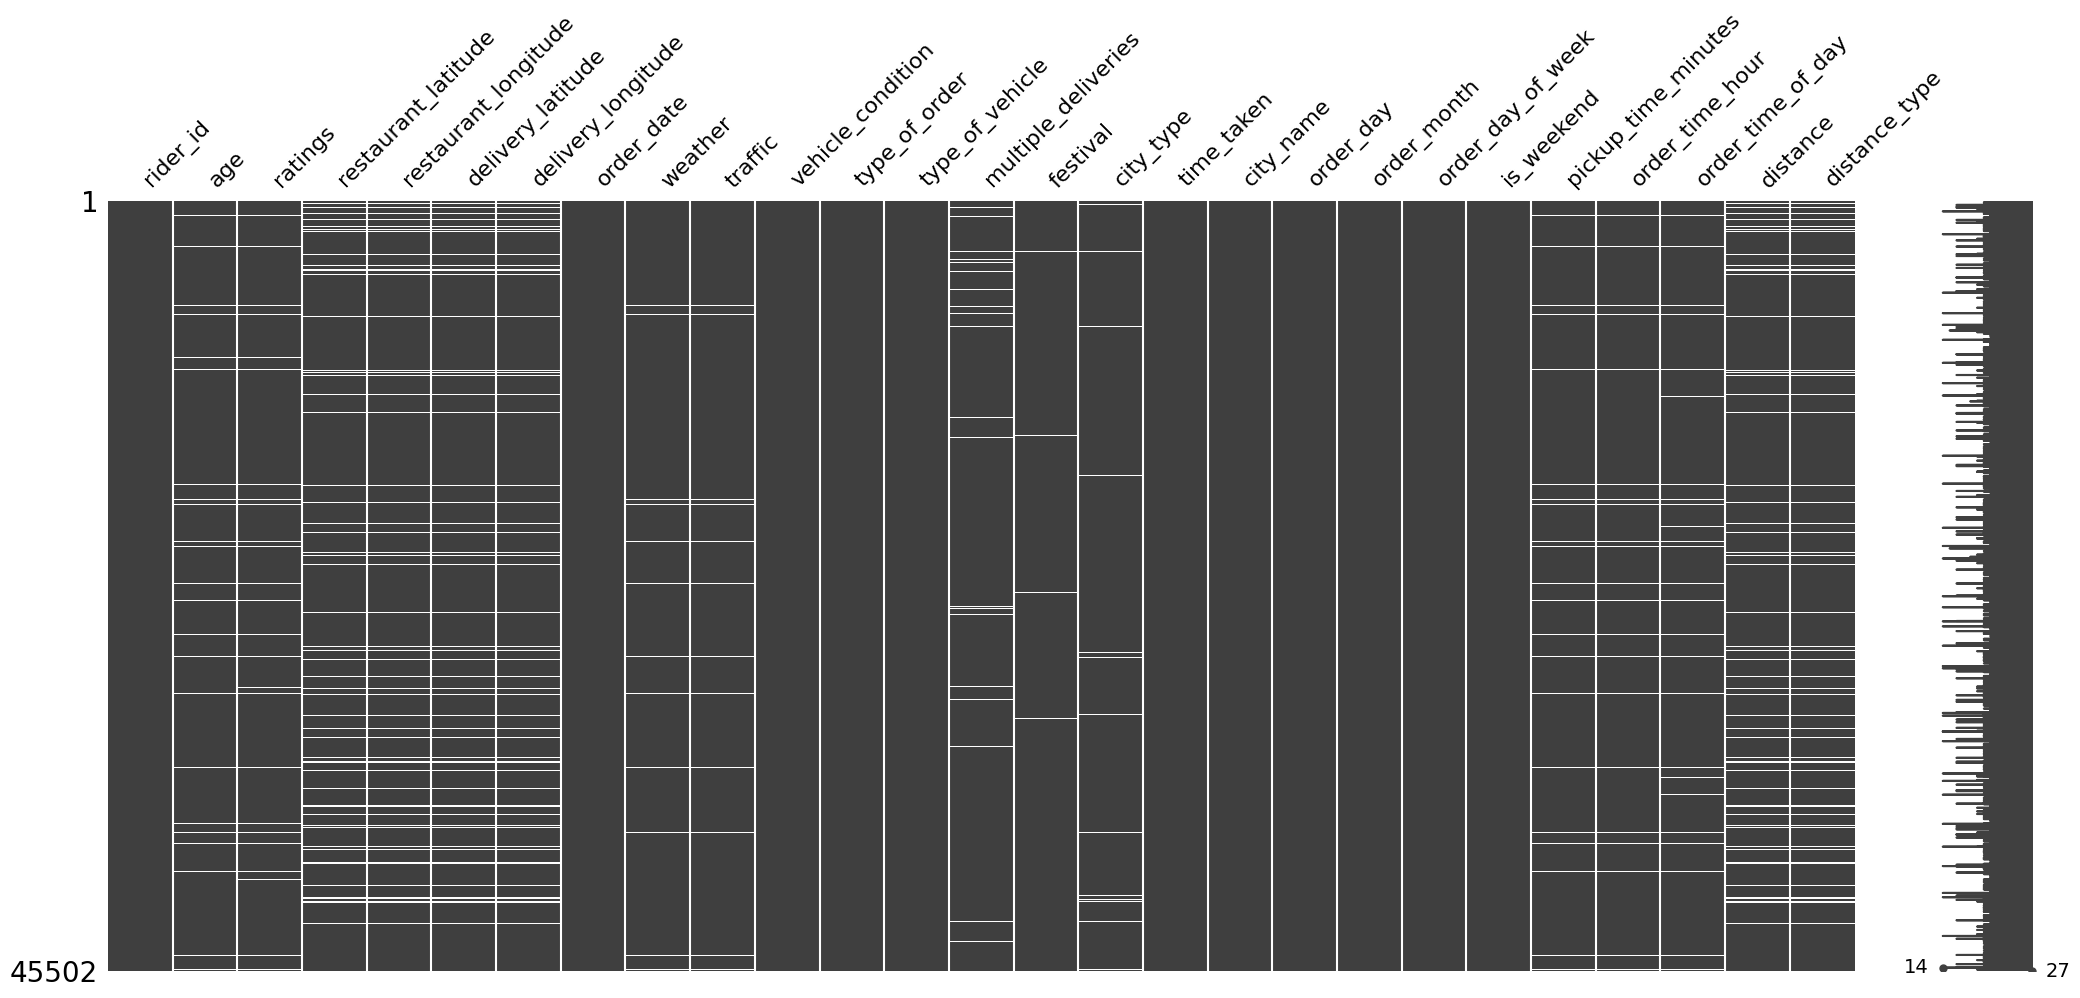

In [ ]:
msno.matrix(df)

<Axes: >

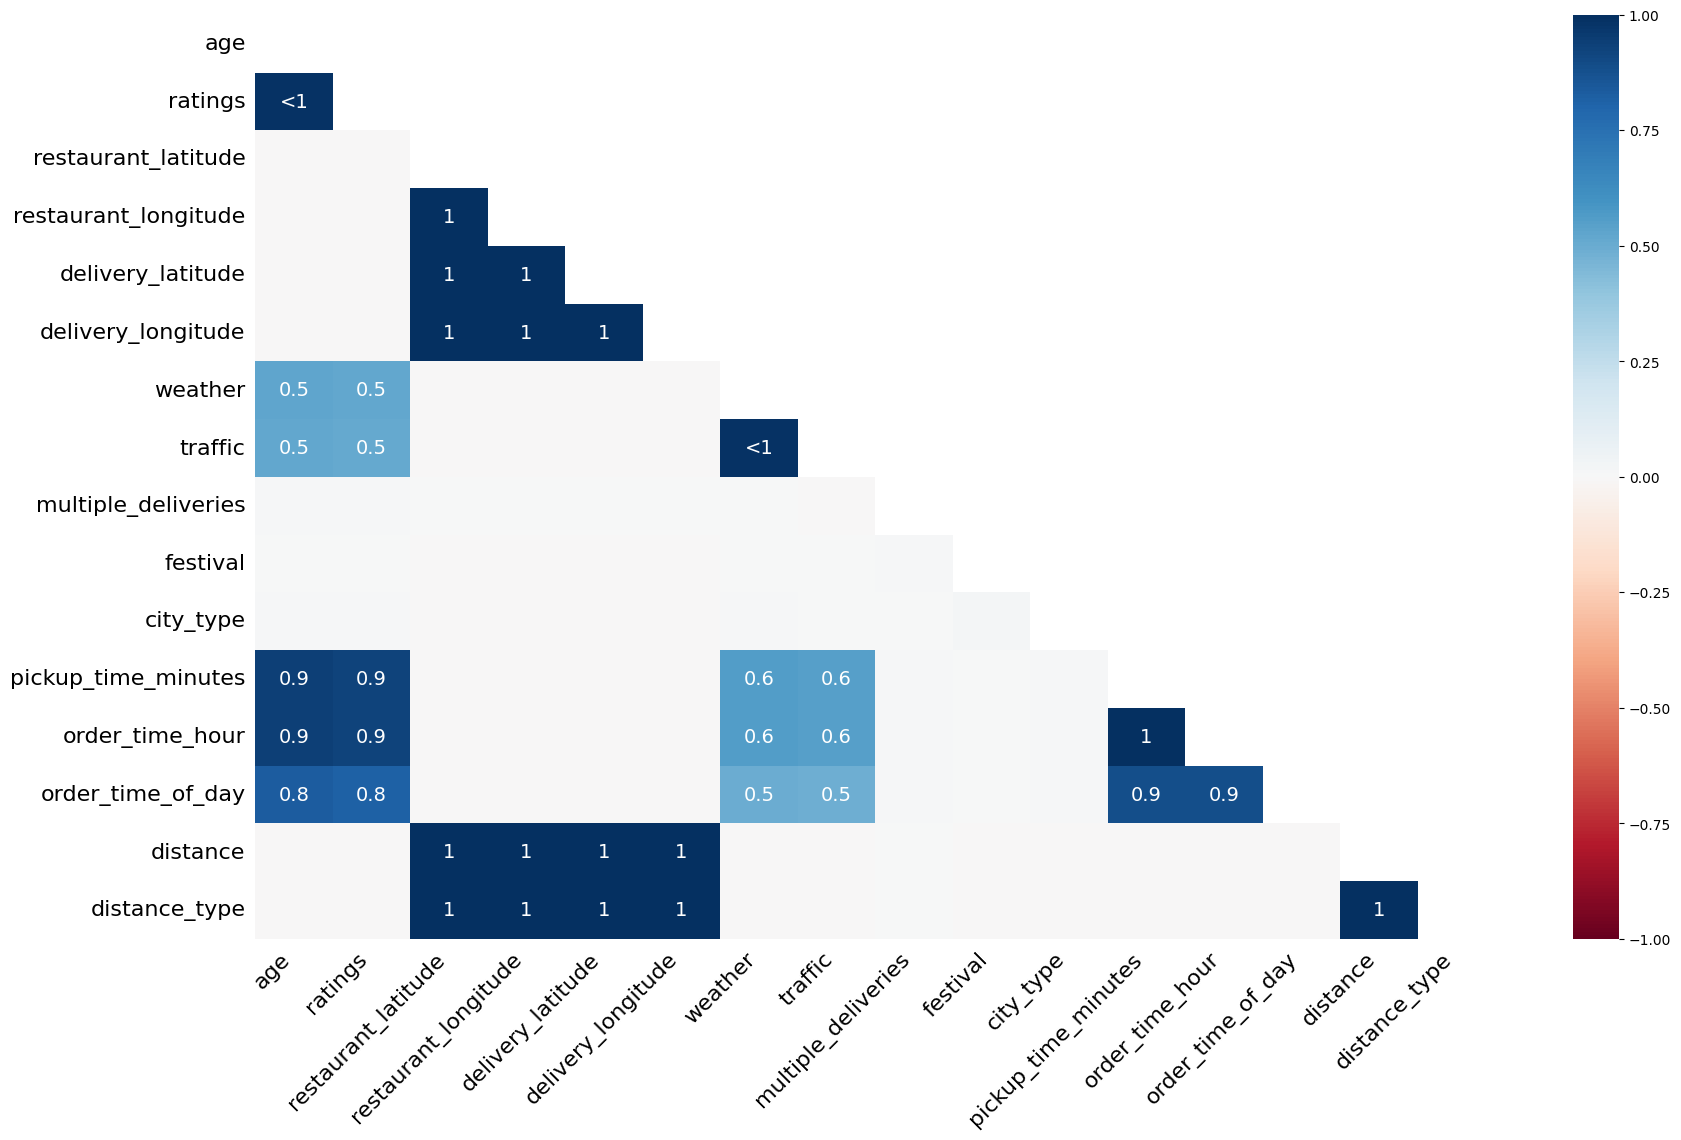

In [ ]:
msno.heatmap(df)

<Axes: >

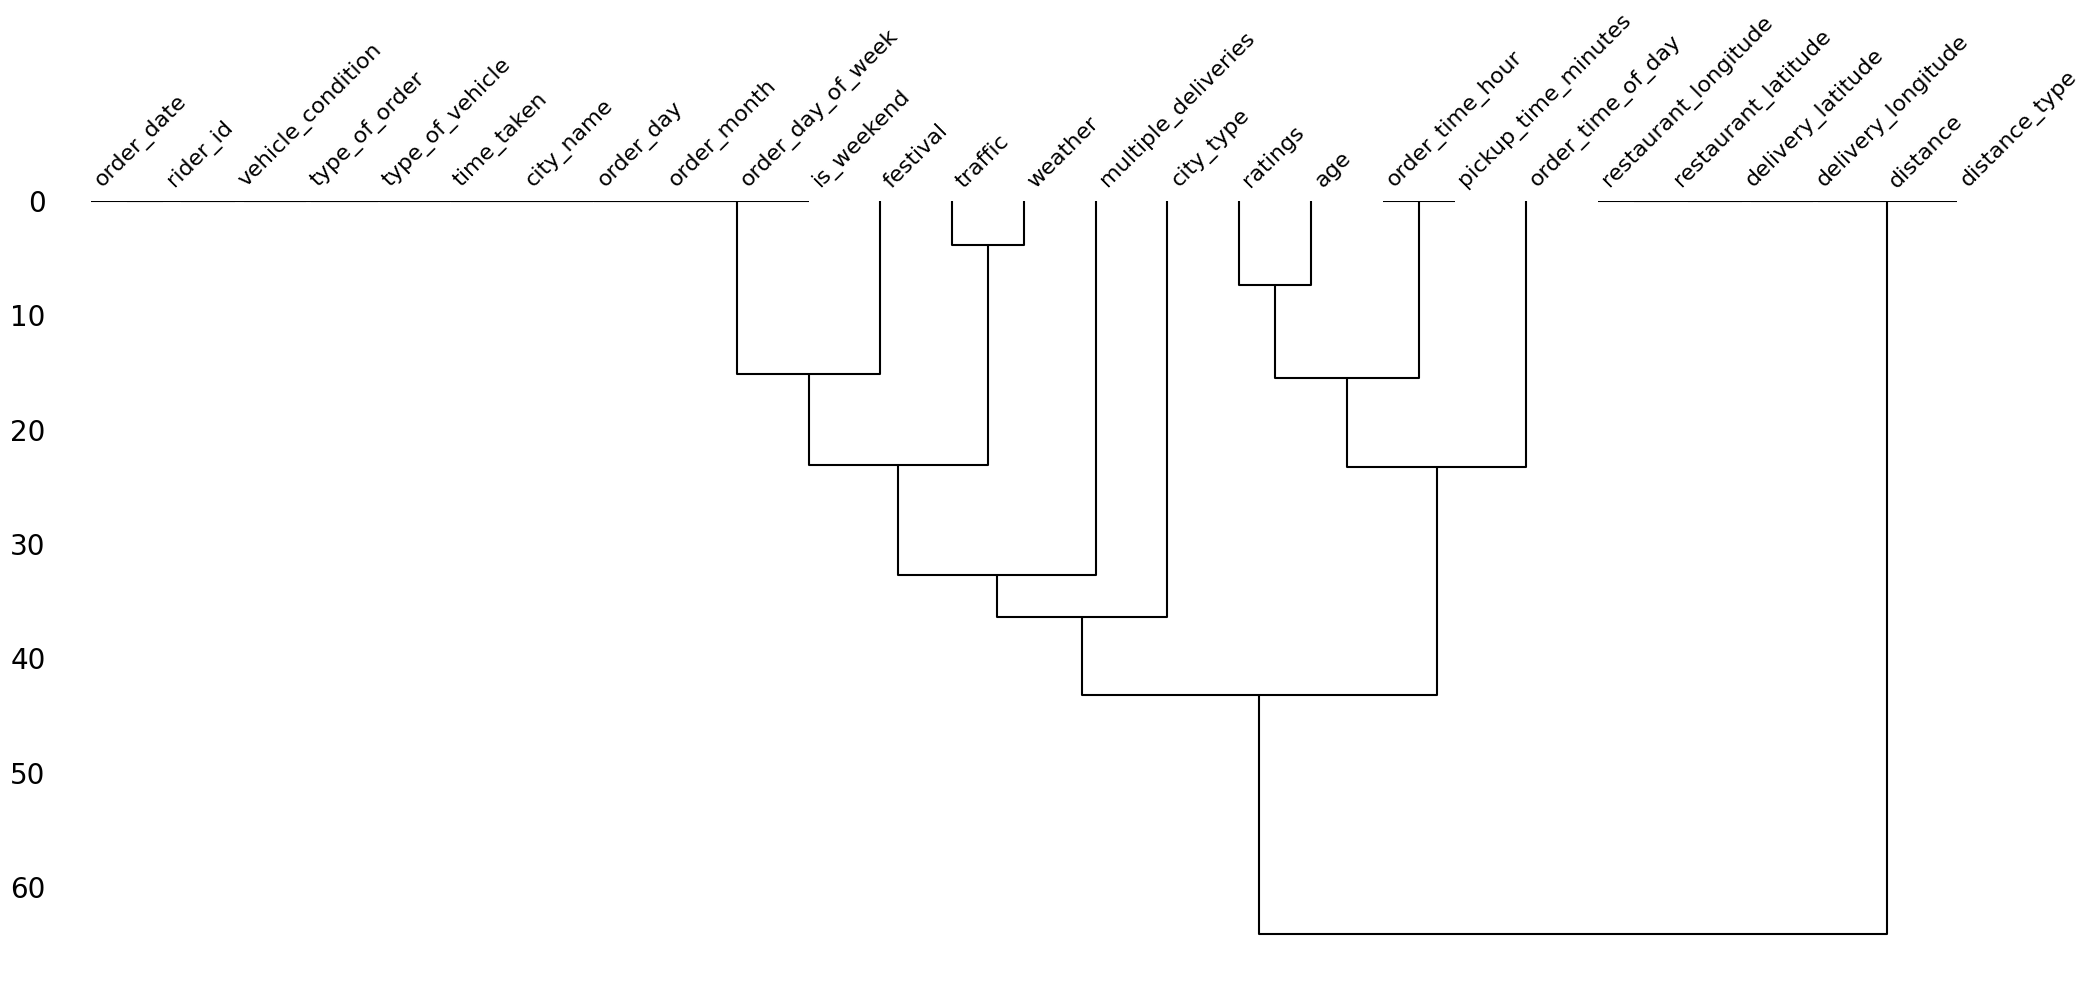

In [ ]:
msno.dendrogram(df)

#FUNCTION FOR ANALYSIS

In [ ]:
def numerical_analysis(dataframe, column_name, cat_col=None, bins="auto"):
    fig = plt.figure(figsize=(15,10))
    grid = GridSpec(nrows=2, ncols=2, figure=fig)
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, :])
    sns.kdeplot(data=dataframe, x=column_name,hue=cat_col, ax=ax1)
    sns.boxplot(data=dataframe, x=column_name,hue=cat_col, ax=ax2)
    sns.histplot(data=dataframe, x=column_name,bins=bins,hue=cat_col,kde=True, ax=ax3)
    plt.tight_layout()
    plt.show()

def numerical_categorical_analysis(dataframe, cat_column_1, num_column):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    sns.barplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[0])
    sns.boxplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax1[1])
    sns.violinplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[0])
    sns.stripplot(data=dataframe, x=cat_column_1, y=num_column, ax=ax2[1])
    plt.tight_layout()
    plt.show()

def categorical_analysis(dataframe, column_name):
    display(
        pd.DataFrame({"Count": (dataframe[column_name].value_counts()),
        "Percentage": (dataframe[column_name].value_counts(normalize=True)
        .mul(100).round(2).astype("str").add("%"))})
    )
    print("*" * 50)
    unique_categories = dataframe[column_name].unique().tolist()
    number_of_categories = dataframe[column_name].nunique()
    print(f"The unique categories in {column_name} column are {unique_categories}")
    print("*" * 50)
    print(f"The number of categories in {column_name} column are {number_of_categories}")
    sns.countplot(data=dataframe, x=column_name)
    plt.xticks(rotation=45)
    plt.show()

def multivariate_analysis(dataframe, num_column, cat_column_1, cat_column_2):
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,7.5))
    sns.barplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, ax=ax1[0])
    sns.boxplot(data=dataframe, x=cat_column_1,
                y=num_column,hue=cat_column_2, gap=0.1, ax=ax1[1])
    sns.violinplot(data=dataframe, x=cat_column_1, gap=0.1,
                   y=num_column,hue=cat_column_2, ax=ax2[0])
    sns.stripplot(data=dataframe, x=cat_column_1,
                  y=num_column,hue=cat_column_2,dodge=True,ax=ax2[1])
    plt.tight_layout()
    plt.show()

def chi_2_test(dataframe, col1, col2, alpha= 0.05):
    data = dataframe.loc[:, [col1, col2]].dropna()
    contingency_table = pd.crosstab(data[col1], data[col2])
    _, p_val, _, _ = chi2_contingency(contingency_table)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")

def anova_test(dataframe, num_col, cat_col, alpha=0.05):
    data = (
        dataframe.loc[:, [num_col, cat_col]]
        .dropna()
    )
    cat_group = data.groupby(cat_col)
    groups = [group[num_col].values for _, group in cat_group]
    f_stat, p_val = f_oneway(*groups)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant relationship between {num_col} and {cat_col}.")

def test_for_normality(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    print("Jarque Bera Test for Normality")
    _, p_val = jarque_bera(data)
    print(p_val)
    if p_val <= alpha:
        print(f"Reject the null hypothesis. The data is not normally distributed.")
    else:
        print(f"Fail to reject the null hypothesis. The data is normally distributed.",end="\n\n")


#Column Wise Analysis

In [ ]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

Time Taken - numerical column

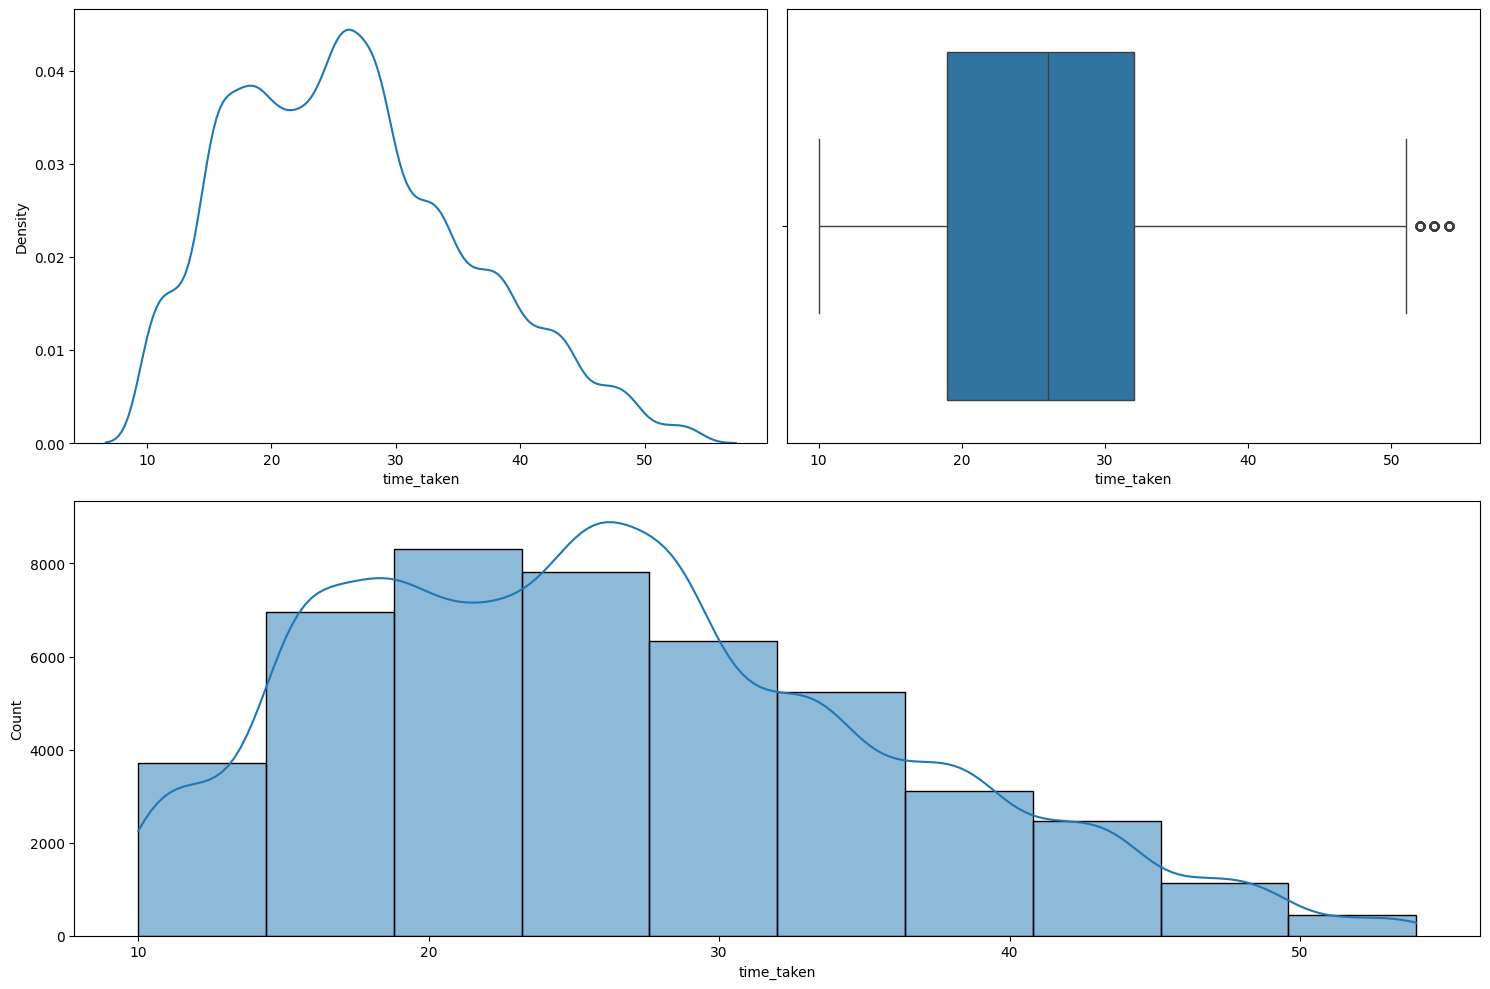

In [ ]:
numerical_analysis(df, 'time_taken', bins=10)

Observations:

  -The target column is not fully continuous in nature.

  -The target column shows dual modality with two peaks- One peak around the 17-18 mark and other around 26-27 mark.

  -The target column has some extreme points which can be thought of as outliers but they are just extreme and rare, not outliers. 50 min time is possible for delivery in certain rare cases.

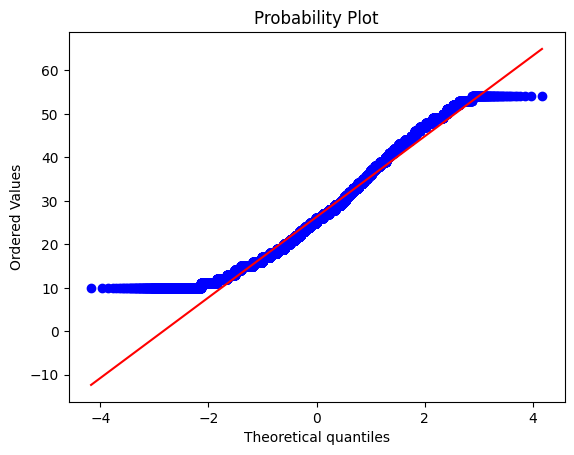

In [ ]:
probplot(df['time_taken'], plot=plt)
plt.show()

In [ ]:
test_for_normality(df, 'time_taken')

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The data is not normally distributed.


In [ ]:
# rows where data is acting as outlier
target_25_per, target_75_per = np.percentile(df['time_taken'], [25, 75])
iqr = target_75_per - target_25_per
upper_bound = target_75_per + (1.5 * iqr)

df.loc[(df['time_taken'] > upper_bound),"traffic"].value_counts()

traffic
jam     241
high     24
Name: count, dtype: int64

It is logical that delivery times will be high for traffic jam or high traffic jam so outliers check out.

In [ ]:
df.loc[(df['time_taken'] > upper_bound),"weather"].value_counts()

weather
fog           57
sunny         51
windy         44
cloudy        44
stormy        37
sandstorms    32
Name: count, dtype: int64

Data is almost equally distributed so weather is not correlated with time taken to deliver

In [ ]:
avg_distance = df.loc[:,"distance"].mean()
avg_distance_extreme = df.loc[(df ['time_taken'] > upper_bound),"distance"].mean()

print(avg_distance, avg_distance_extreme)

9.719296323199579 13.29215081388658


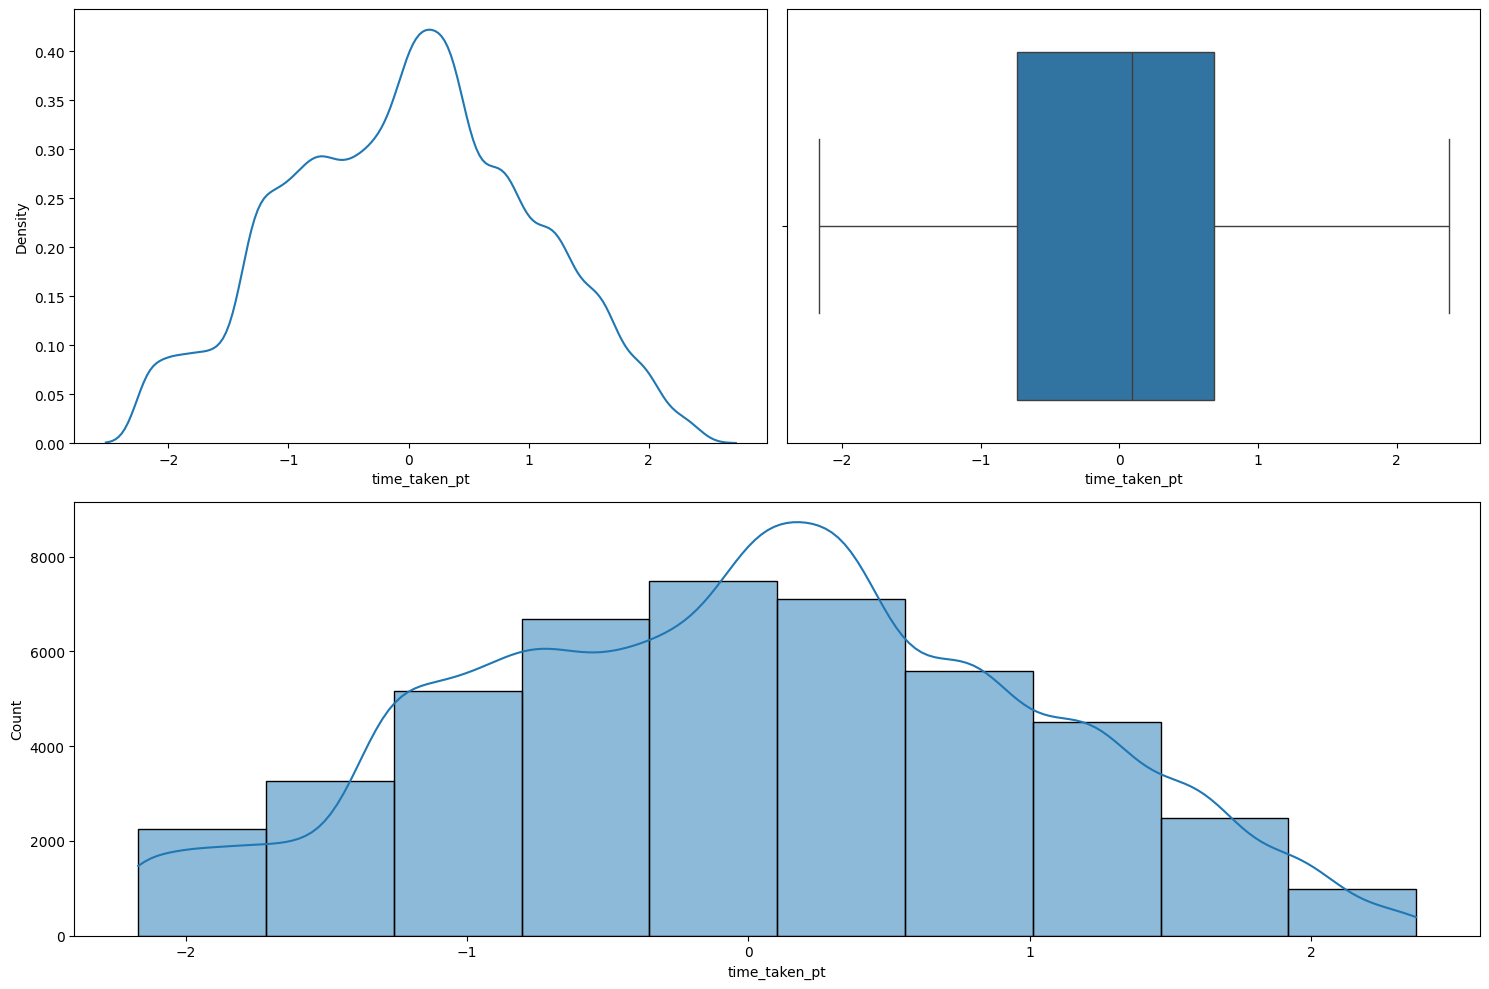

In [ ]:
# fix traget column using transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['time_taken_pt'] = pt.fit_transform(df[['time_taken']])
numerical_analysis(df, "time_taken_pt", bins=10)

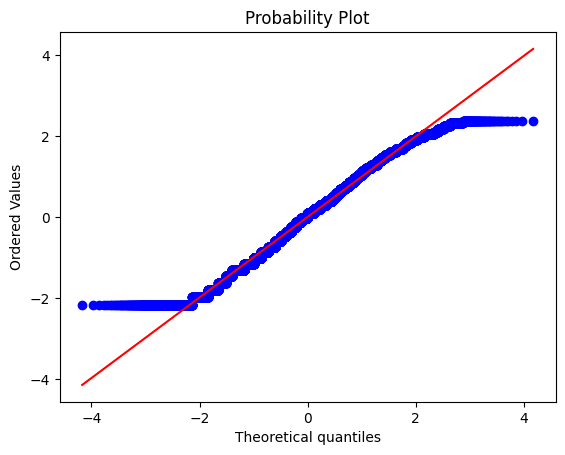

In [ ]:
# QQ plot for the target after transformation

probplot(df['time_taken_pt'], plot=plt)
plt.show()

Rider id

In [ ]:
rider_id_group = df[["rider_id","age","ratings"]].groupby('rider_id')
rider_id_group.head(5).sort_values('rider_id')

rider_id   age  ratings
92     AGRRES010DEL01   34.0      4.7
7738   AGRRES010DEL01   21.0      4.7
4554   AGRRES010DEL01   38.0      4.7
12416  AGRRES010DEL01   34.0      4.5
13223  AGRRES010DEL01   39.0      4.4
...                ...   ...      ...
861     VADRES20DEL03   35.0      4.8
9792    VADRES20DEL03   30.0      4.6
9753    VADRES20DEL03   38.0      4.8
5094    VADRES20DEL03   35.0      4.9
5146    VADRES20DEL03   37.0      4.9

[6600 rows x 3 columns]

In [ ]:
df[["rider_id","age","ratings"]].dropna().duplicated(keep=False).sum()

np.int64(10155)

Clearly, there are riders who have carried out a lot of orders and that is logical and understandable. But they wont help us in determining time taken for delivery

Age

In [ ]:
df.age.describe()

count    43648.000000
mean        29.555008
std          5.761482
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

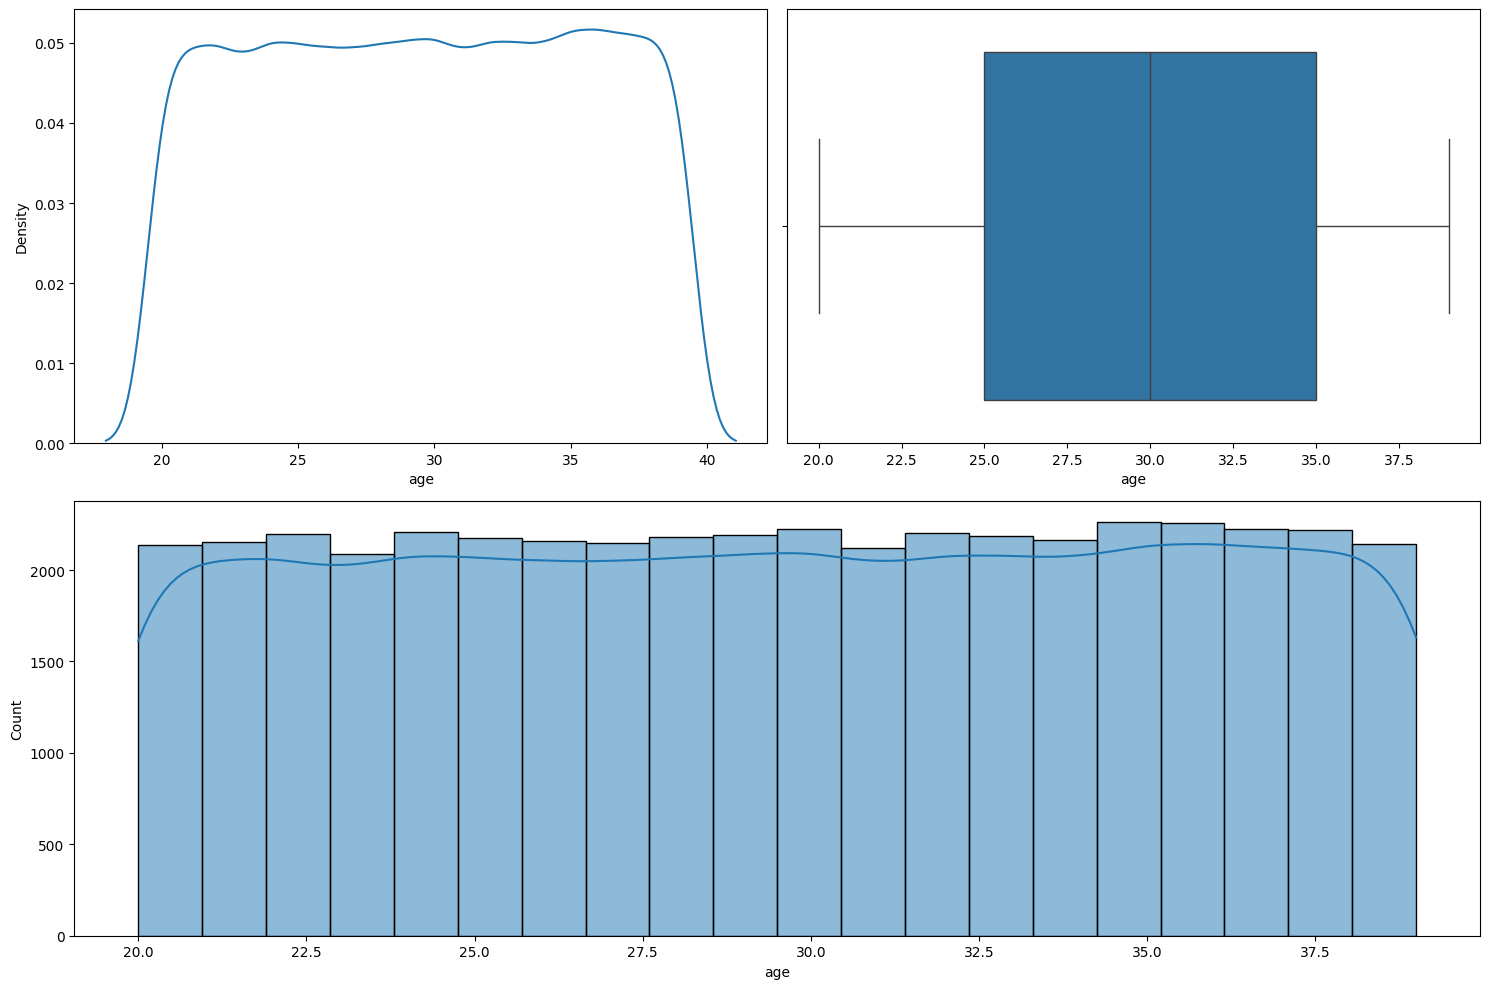

In [ ]:
numerical_analysis(df, 'age', bins=20)

Age of the rider does not show any impact on timetaken to deliver

<Axes: xlabel='type_of_vehicle', ylabel='age'>

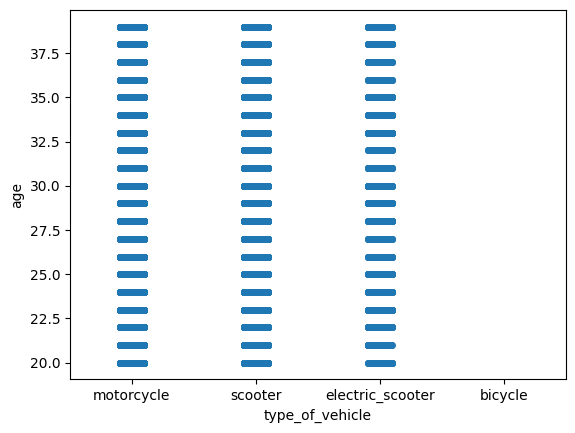

In [ ]:
sns.stripplot(df,x='type_of_vehicle',y='age')

Ratings

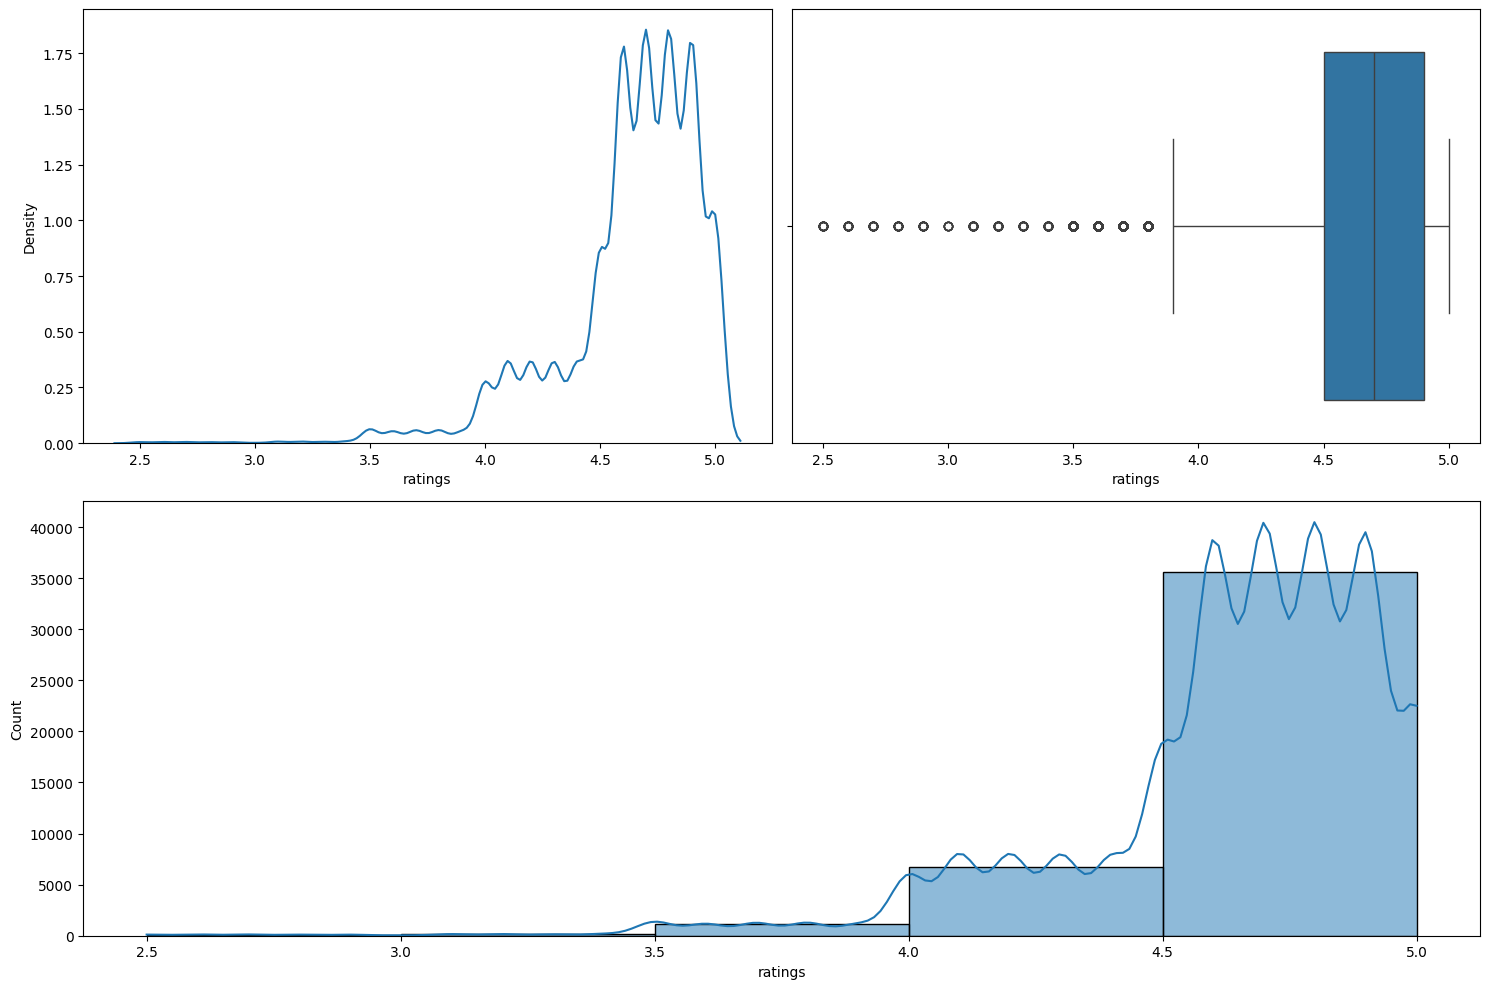

In [ ]:
numerical_analysis(df, 'ratings', bins=5)

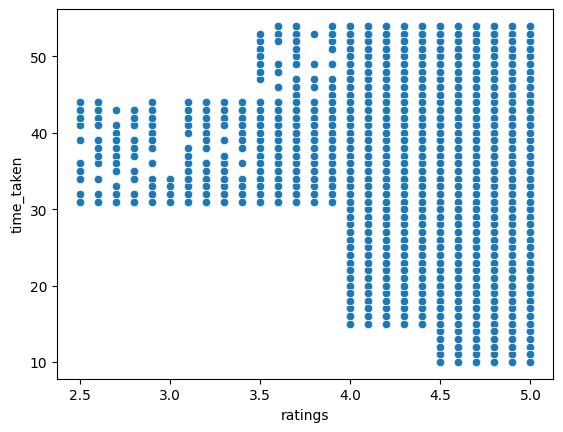

In [ ]:
sns.scatterplot(data=df, x='ratings', y='time_taken')
plt.show()

It seems like riders with more ratings get more orders

Higher ratings equates to more work and more income opportunities

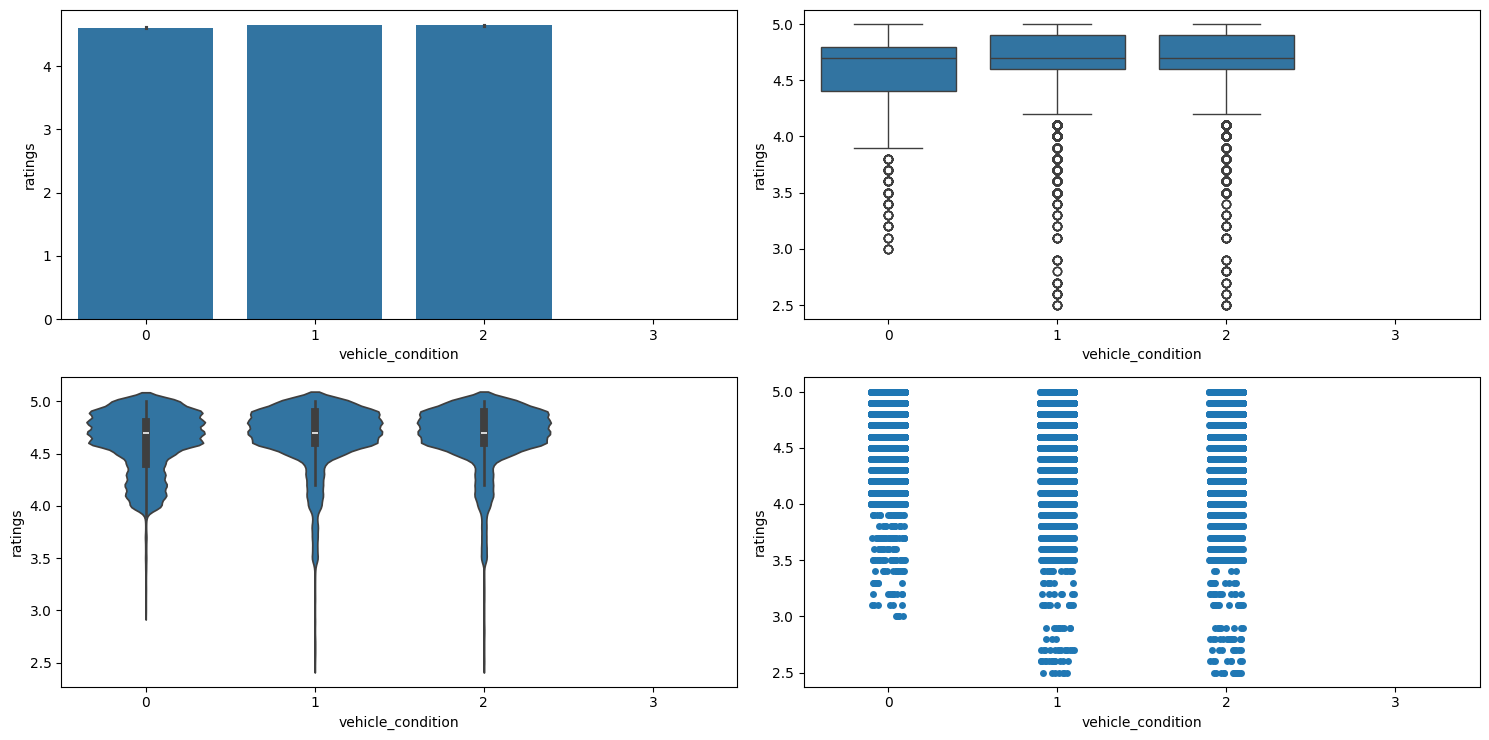

In [ ]:
numerical_categorical_analysis(df, 'vehicle_condition', 'ratings')

The more worst the vehicle condition is, the more lower the rating gets.

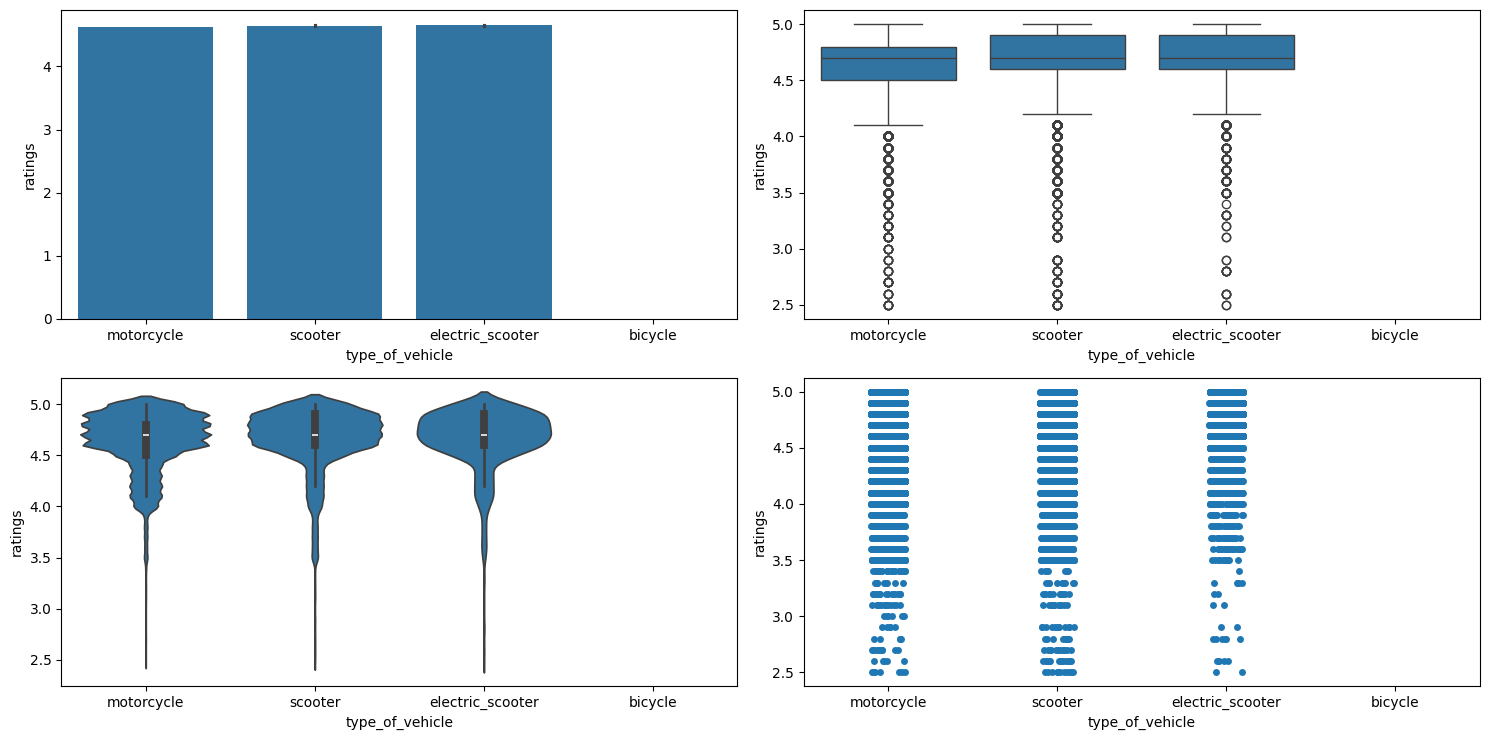

In [ ]:
numerical_categorical_analysis(df, 'type_of_vehicle', 'ratings')

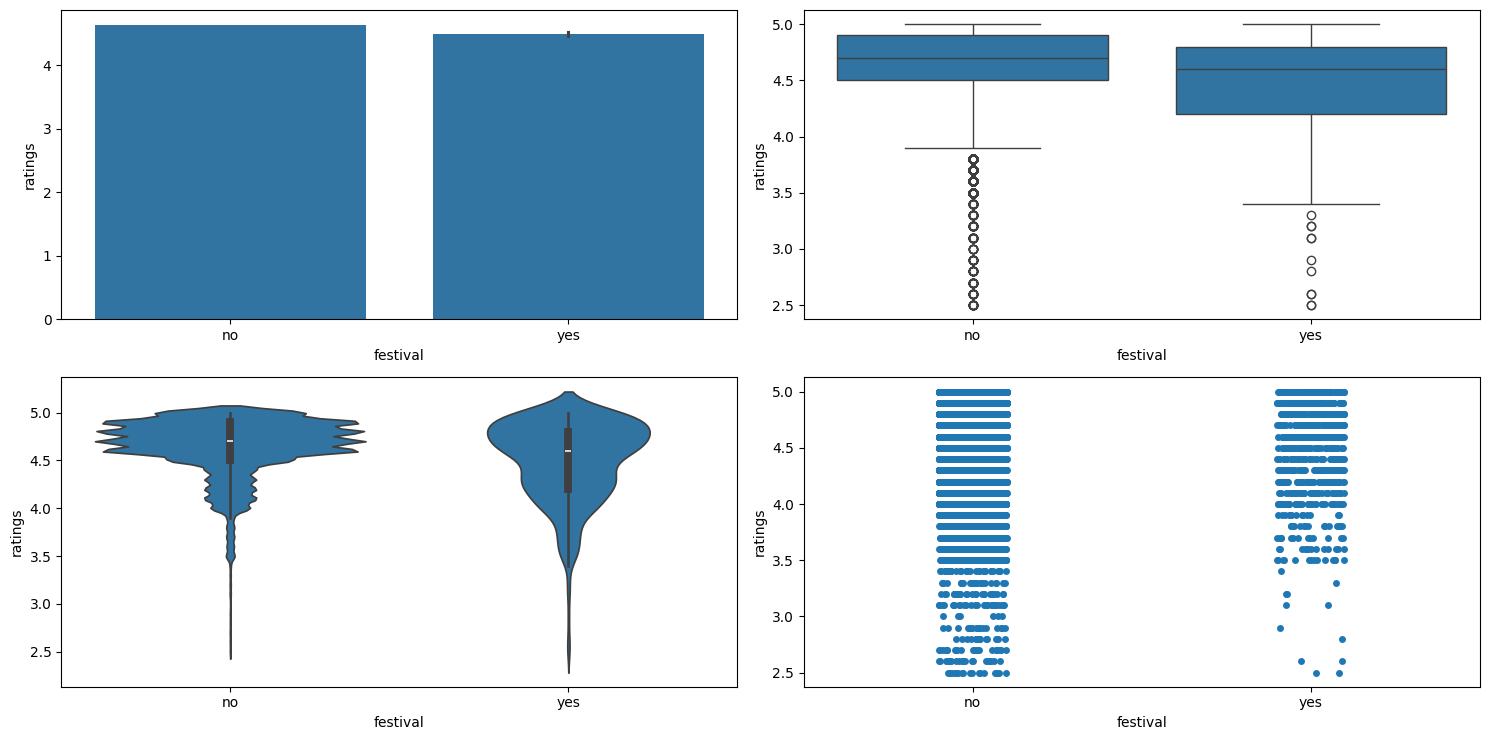

In [ ]:
numerical_categorical_analysis(df, 'festival', 'ratings')

Location Based Features

In [ ]:
df.columns[3:7].tolist() + ["city_name"]

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'city_name']

In [ ]:
location_subset = df.loc[:,df.columns[3:7].tolist() + ["city_name"]]
location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                22.745049             75.892471          22.765049   
1                12.913041             77.683237          13.043041   
2                12.914264             77.678400          12.924264   
3                11.003669             76.976494          11.053669   
4                12.972793             80.249982          13.012793   
...                    ...                   ...                ...   
45497            26.902328             75.794257          26.912328   
45498                  NaN                   NaN                NaN   
45499            13.022394             80.242439          13.052394   
45500            11.001753             76.986241          11.041753   
45501            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               75.912471      INDO  
1               77.813237      BANG  
2               77.688400      BANG  
3               77.026494     COIMB  
4               80.289982      CHEN  
...                   ...       ...  
45497           75.804257       JAP  
45498                 NaN       AGR  
45499           80.272439      CHEN  
45500           77.026241     COIMB  
45501           85.405731    RANCHI  

[45502 rows x 5 columns]

In [ ]:
location_subset.dtypes

restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
city_name                object
dtype: object

In [ ]:
location_subset.dropna(inplace=True)

Visualising cities on Map

In [ ]:
# plot deliveries on map
delivery_df = pd.DataFrame({
    'latitude': location_subset['delivery_latitude'],
    'longitude': location_subset['delivery_longitude'],
    "city_name": location_subset["city_name"]
})

# Map using Plotly's scatter_mapbox
fig = px.scatter_mapbox(
    delivery_df,
    lat='latitude',
    lon='longitude',
    title="Delivery Points",
    hover_name="city_name"
)

# Updating the layout for the map of India
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 20.5937, "lon": 78.9629},  # Centered over India
    mapbox_zoom=3,
)

fig.show()

Order Date

In [ ]:
df.filter(like="order")

order_date type_of_order  order_day  order_month order_day_of_week  \
0      2022-03-19         snack         19            3          saturday   
1      2022-03-25         snack         25            3            friday   
2      2022-03-19        drinks         19            3          saturday   
3      2022-04-05        buffet          5            4           tuesday   
4      2022-03-26         snack         26            3          saturday   
...           ...           ...        ...          ...               ...   
45497  2022-03-24          meal         24            3          thursday   
45498  2022-02-16        buffet         16            2         wednesday   
45499  2022-03-11        drinks         11            3            friday   
45500  2022-03-07         snack          7            3            monday   
45501  2022-03-02         snack          2            3         wednesday   

       order_time_hour order_time_of_day  
0                 11.0           morning  
1                 19.0           evening  
2                  8.0           morning  
3                 18.0           evening  
4                 13.0         afternoon  
...                ...               ...  
45497             11.0           morning  
45498             19.0           evening  
45499             23.0             night  
45500             13.0         afternoon  
45501             17.0         afternoon  

[45502 rows x 7 columns]

In [ ]:
order_date_subset = df.loc[:,["order_date","order_day","order_month","order_day_of_week","is_weekend","festival"]]
order_date_subset

order_date  order_day  order_month order_day_of_week  is_weekend  \
0      2022-03-19         19            3          saturday           1   
1      2022-03-25         25            3            friday           0   
2      2022-03-19         19            3          saturday           1   
3      2022-04-05          5            4           tuesday           0   
4      2022-03-26         26            3          saturday           1   
...           ...        ...          ...               ...         ...   
45497  2022-03-24         24            3          thursday           0   
45498  2022-02-16         16            2         wednesday           0   
45499  2022-03-11         11            3            friday           0   
45500  2022-03-07          7            3            monday           0   
45501  2022-03-02          2            3         wednesday           0   

      festival  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
45497       no  
45498       no  
45499       no  
45500       no  
45501       no  

[45502 rows x 6 columns]

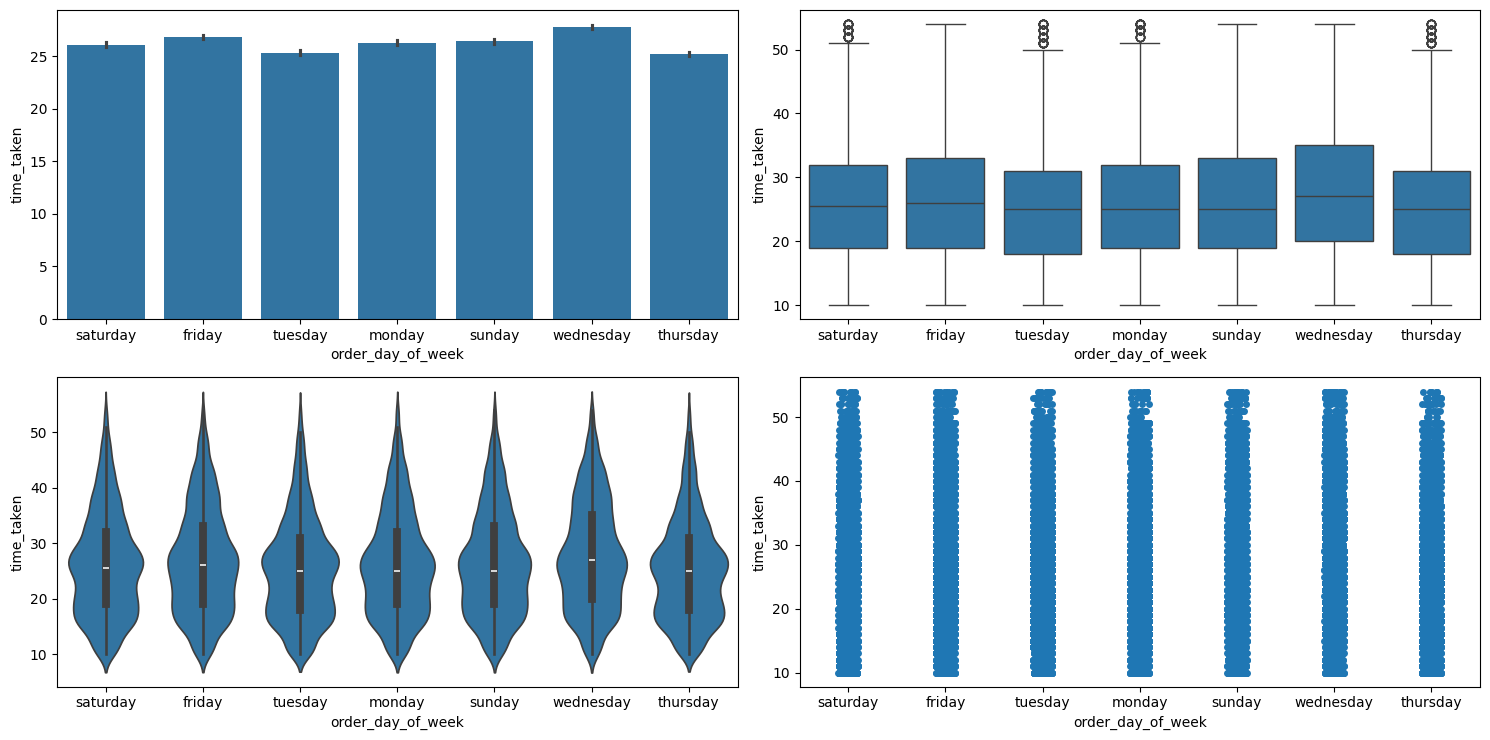

In [ ]:
numerical_categorical_analysis(df, "order_day_of_week", "time_taken")

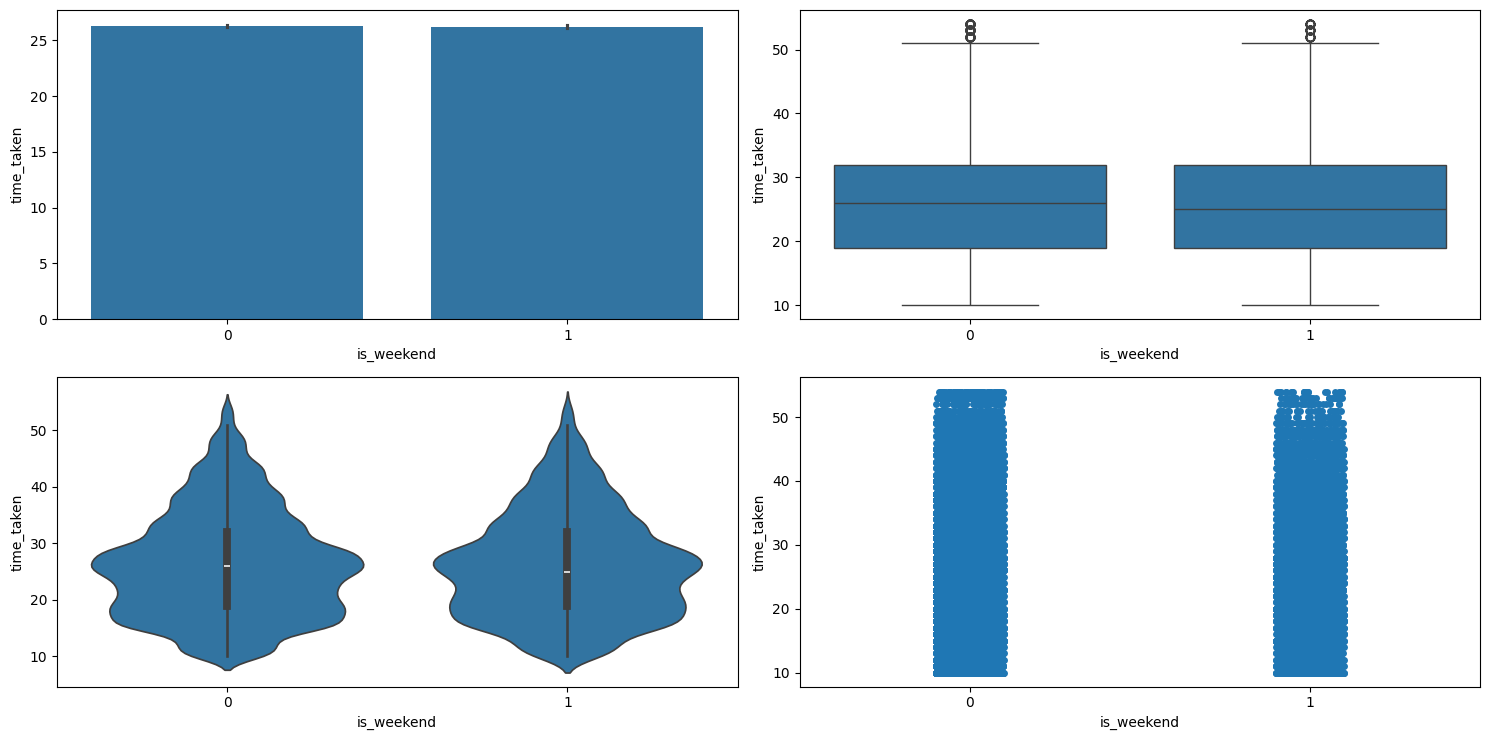

In [ ]:
numerical_categorical_analysis(df, "is_weekend", "time_taken")

In [ ]:
chi_2_test(df, "is_weekend", "traffic")

0.6845961396354259
Fail to reject the null hypothesis. There is no significant association between is_weekend and traffic.


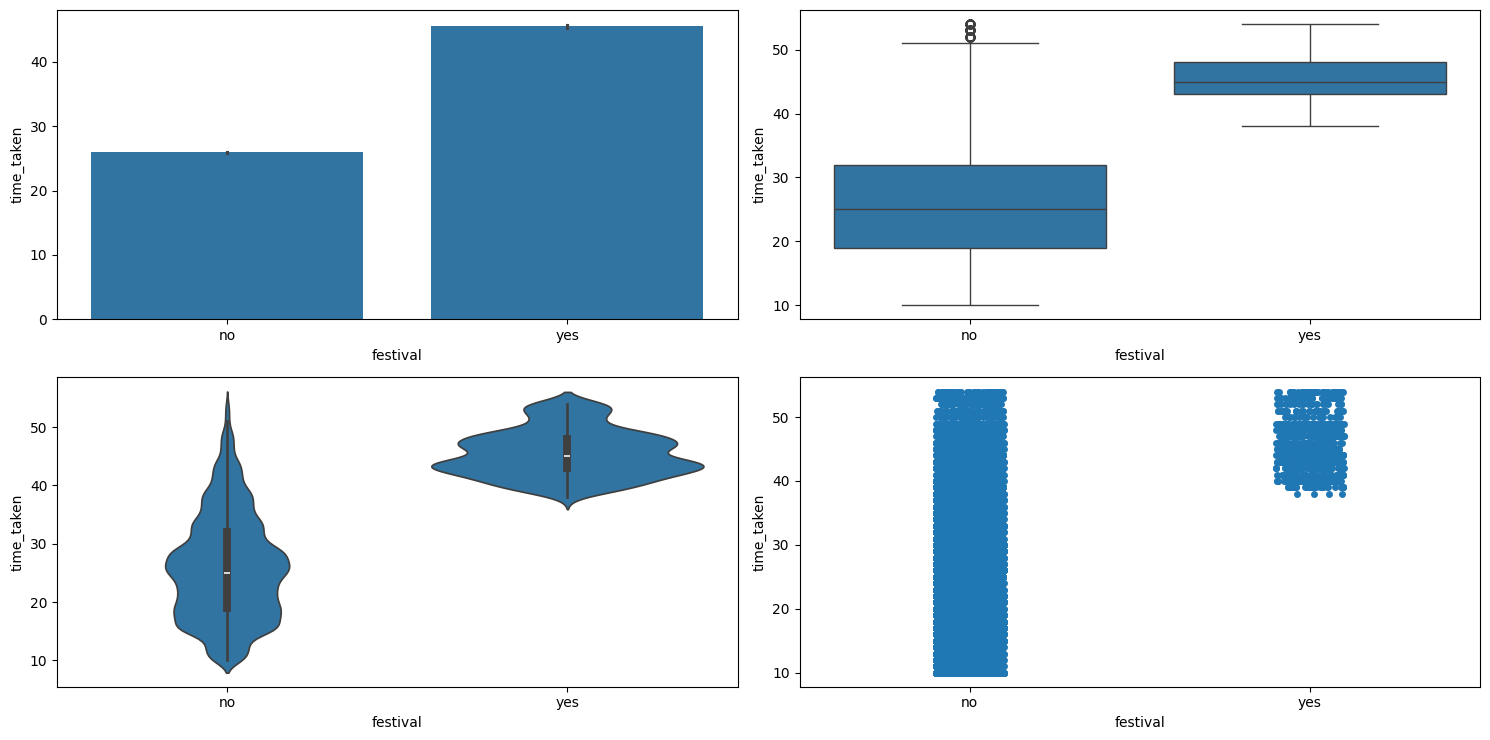

In [ ]:
numerical_categorical_analysis(df, "festival", "time_taken")

During festivals, delivery times are longer (festival->more traffic->longer deliveries)

In [ ]:
chi_2_test(df, "festival", "traffic")

1.1223471129146869e-153
Reject the null hypothesis. There is a significant association between festival and traffic.


In [ ]:
df.pivot_table(index="traffic",columns="festival",values="time_taken",aggfunc="mean")

festival         no        yes
traffic                       
high      27.010373  45.826087
jam       30.538039  46.093651
low       21.284332  42.020000
medium    26.550288  43.715385

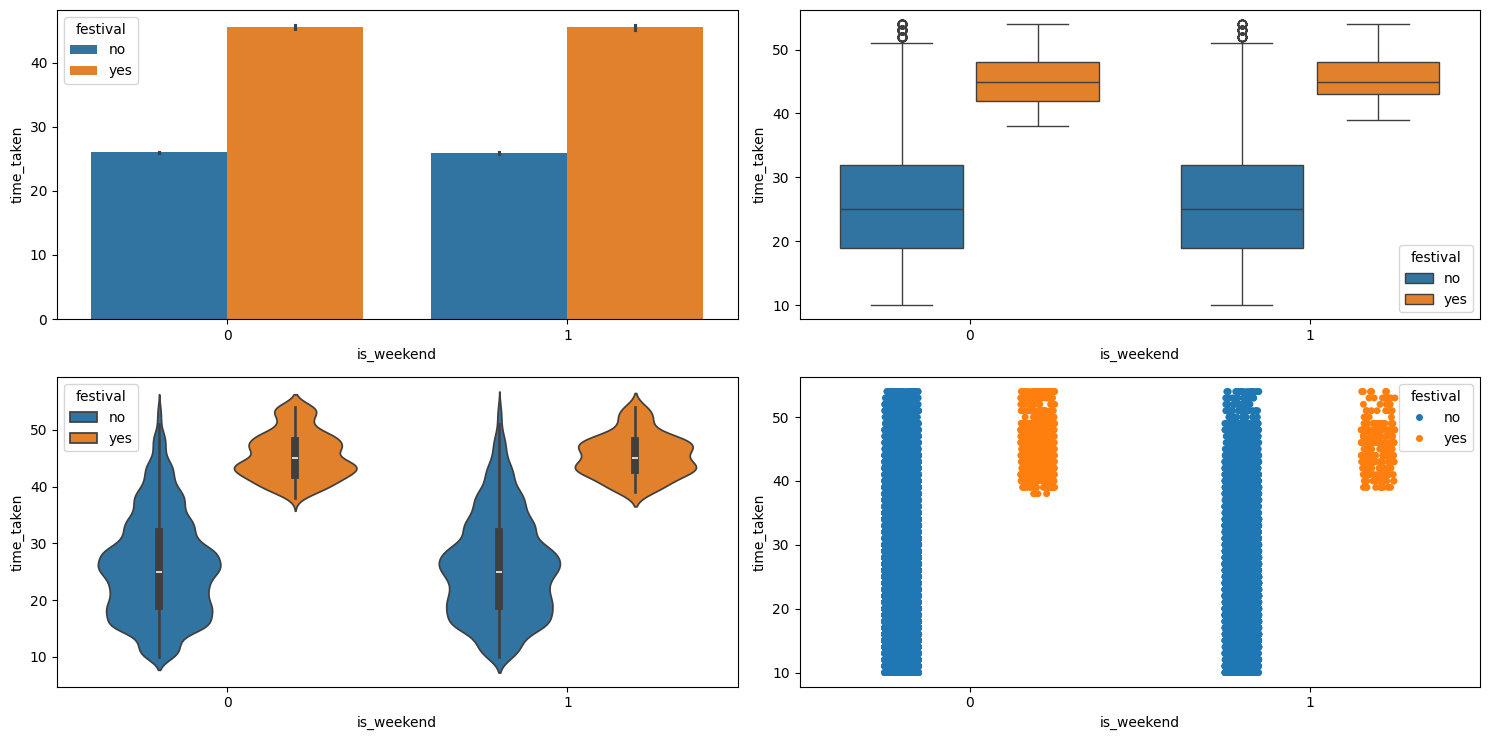

In [ ]:
multivariate_analysis(df, "time_taken", "is_weekend", "festival")

Order Time

In [ ]:
time_subset = df.loc[:,["order_time_hour","order_time_of_day","pickup_time_minutes"]]
time_subset

order_time_hour order_time_of_day  pickup_time_minutes
0                 11.0           morning                 15.0
1                 19.0           evening                  5.0
2                  8.0           morning                 15.0
3                 18.0           evening                 10.0
4                 13.0         afternoon                 15.0
...                ...               ...                  ...
45497             11.0           morning                 10.0
45498             19.0           evening                 15.0
45499             23.0             night                 15.0
45500             13.0         afternoon                  5.0
45501             17.0         afternoon                  5.0

[45502 rows x 3 columns]

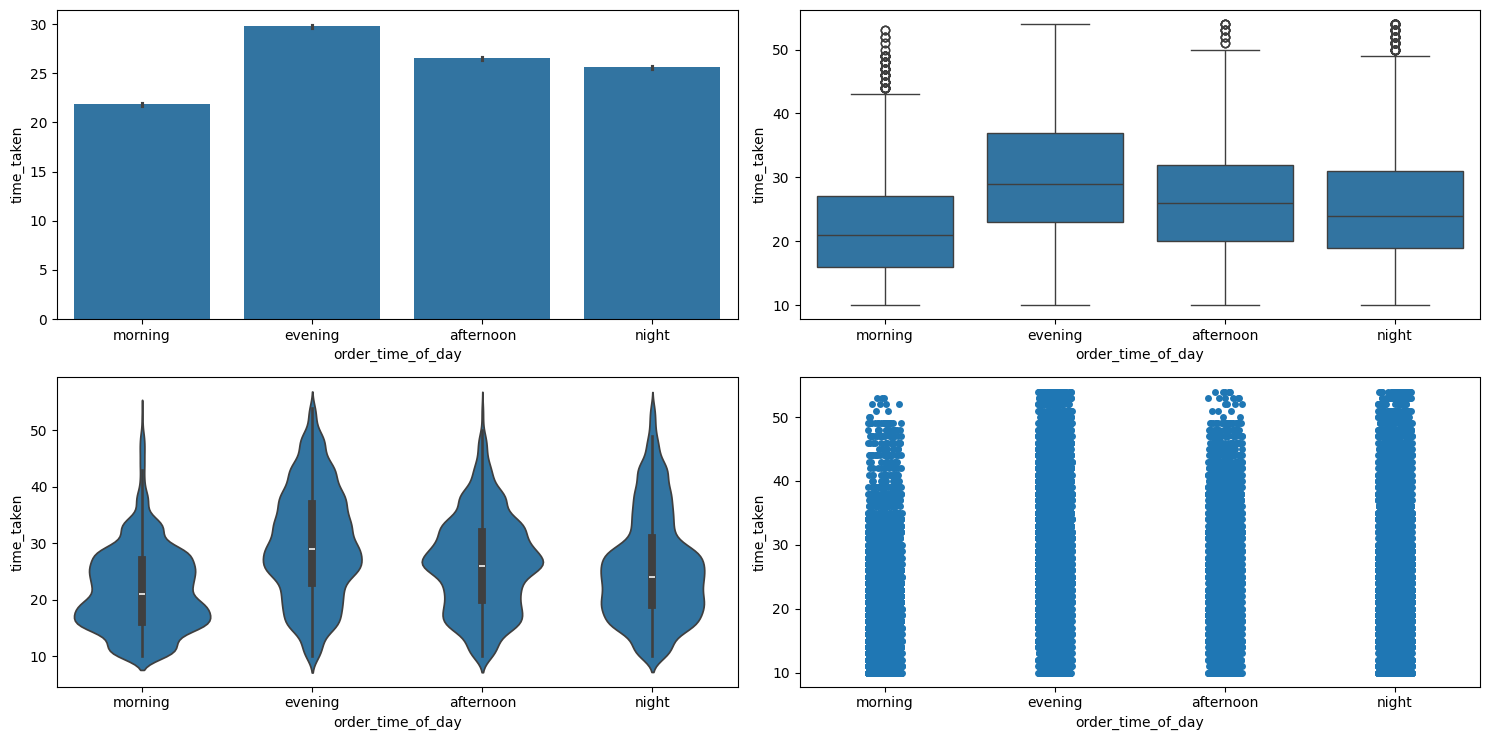

In [ ]:
numerical_categorical_analysis(df, "order_time_of_day", "time_taken")

In [ ]:
chi_2_test(df, "order_time_of_day", "traffic")

0.0
Reject the null hypothesis. There is a significant association between order_time_of_day and traffic.


In [ ]:
anova_test(df, "time_taken", "order_time_of_day")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and order_time_of_day.


In [ ]:
df["order_time_hour"].value_counts().head(5)

order_time_hour
21.0    4686
19.0    4595
22.0    4576
20.0    4539
23.0    4511
Name: count, dtype: int64

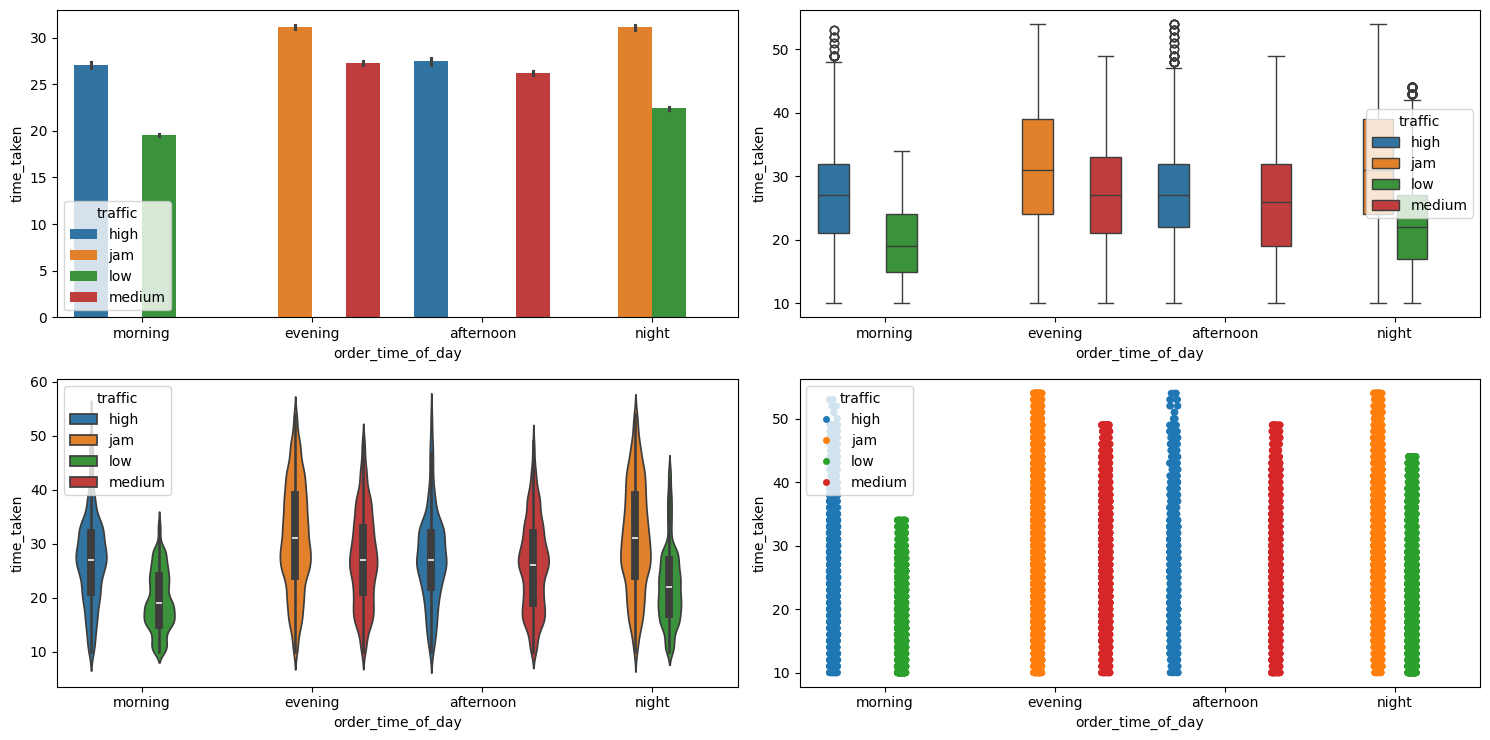

In [ ]:
multivariate_analysis(df, "time_taken", "order_time_of_day", "traffic")

Count Percentage
order_time_hour                  
21.0              4686     10.68%
19.0              4595     10.48%
22.0              4576     10.43%
20.0              4539     10.35%
23.0              4511     10.28%
18.0              4480     10.21%
17.0              4278      9.75%
10.0              1991      4.54%
11.0              1962      4.47%
9.0               1947      4.44%
8.0               1818      4.14%
12.0               892      2.03%
15.0               873      1.99%
14.0               791       1.8%
13.0               784      1.79%
16.0               709      1.62%
0.0                430      0.98%

**************************************************
The unique categories in order_time_hour column are [11.0, 19.0, 8.0, 18.0, 13.0, 21.0, 17.0, 20.0, 14.0, 9.0, 22.0, 12.0, 23.0, nan, 10.0, 16.0, 15.0, 0.0]
**************************************************
The number of categories in order_time_hour column are 17


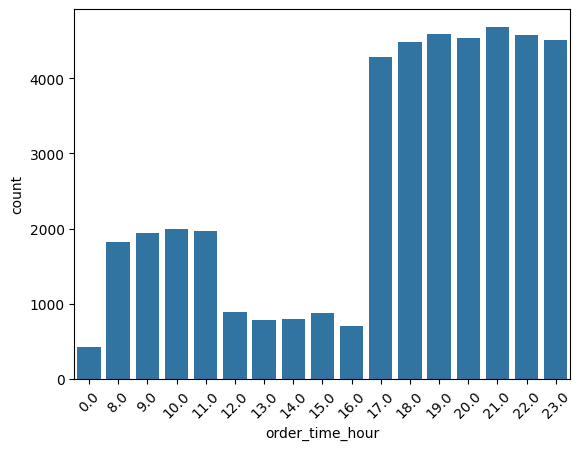

In [ ]:
categorical_analysis(df, "order_time_hour")

Count Percentage
order_time_of_day                  
night              13773     31.71%
evening            13614     31.35%
morning             8610     19.82%
afternoon           7435     17.12%

**************************************************
The unique categories in order_time_of_day column are ['morning', 'evening', 'afternoon', 'night', nan]
**************************************************
The number of categories in order_time_of_day column are 4


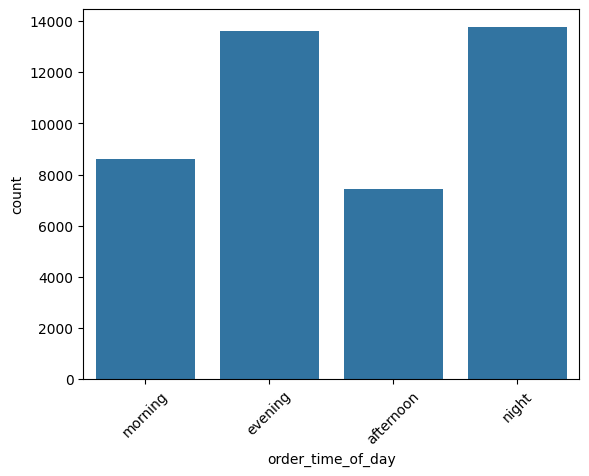

In [ ]:
categorical_analysis(df, "order_time_of_day")

Pickup Time

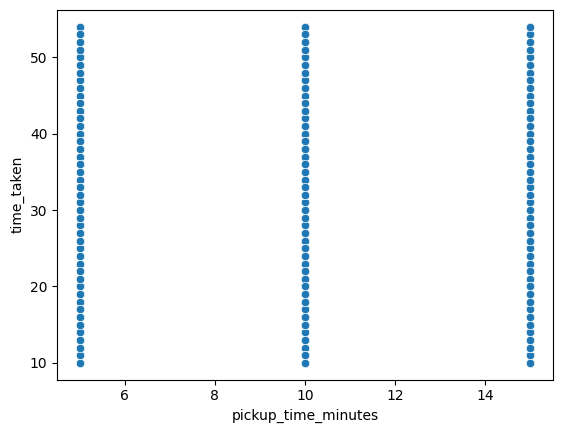

In [ ]:
sns.scatterplot(df,x="pickup_time_minutes",y="time_taken")
plt.show()

Count Percentage
pickup_time_minutes                  
5.0                  14703     33.52%
15.0                 14610     33.31%
10.0                 14549     33.17%

**************************************************
The unique categories in pickup_time_minutes column are [15.0, 5.0, 10.0, nan]
**************************************************
The number of categories in pickup_time_minutes column are 3


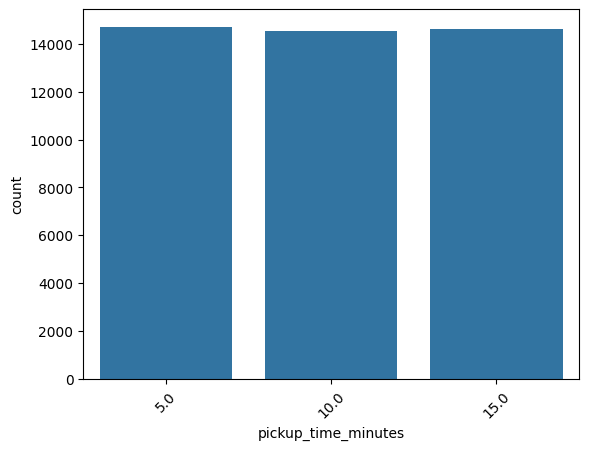

In [ ]:
categorical_analysis(df, "pickup_time_minutes")

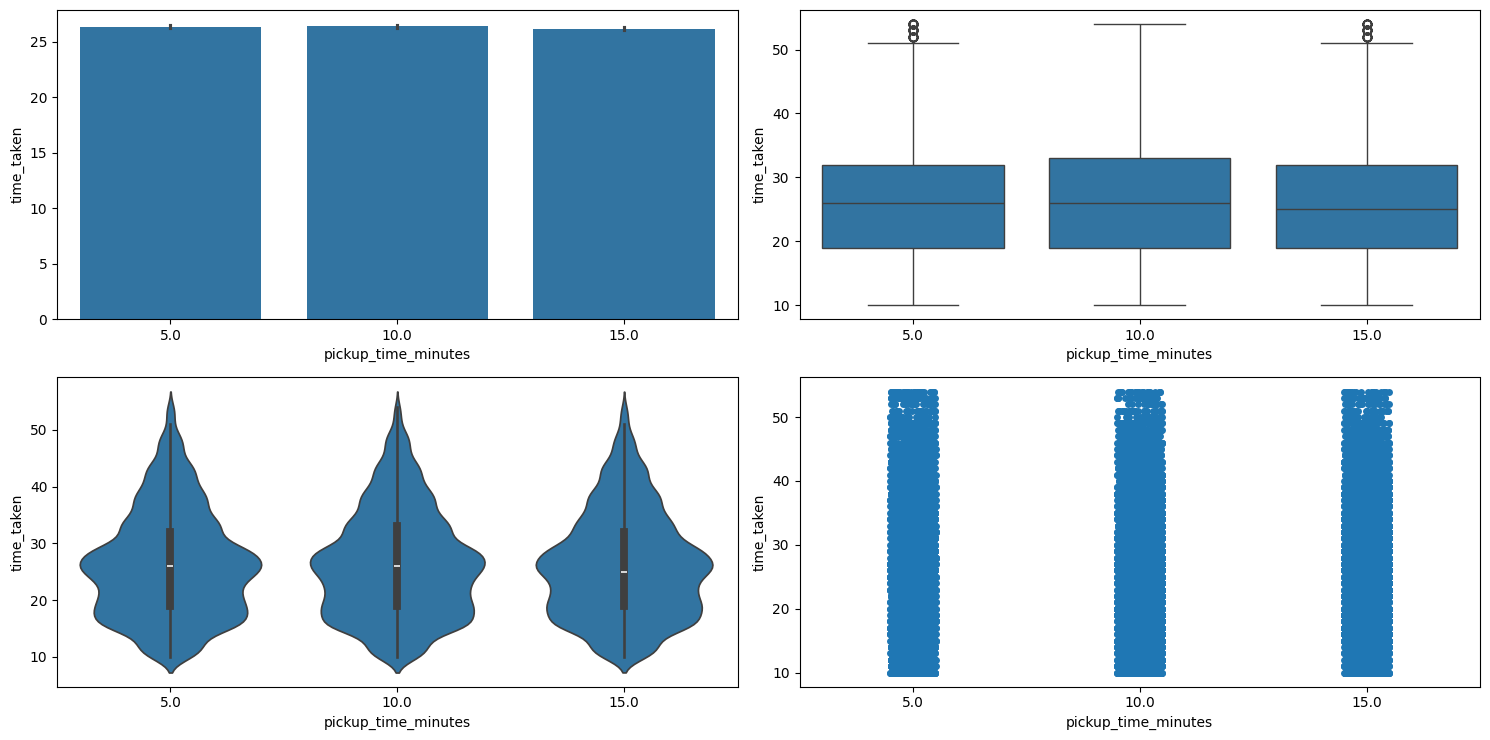

In [ ]:
numerical_categorical_analysis(df, "pickup_time_minutes", "time_taken")

In [ ]:
anova_test(df, "time_taken", "pickup_time_minutes")

0.09932647028954891
Fail to reject the null hypothesis. There is no significant relationship between time_taken and pickup_time_minutes.


Traffic

Count Percentage
traffic                  
low      15477      34.4%
jam      14143     31.43%
medium   10947     24.33%
high      4425      9.84%

**************************************************
The unique categories in traffic column are ['high', 'jam', 'low', 'medium', nan]
**************************************************
The number of categories in traffic column are 4


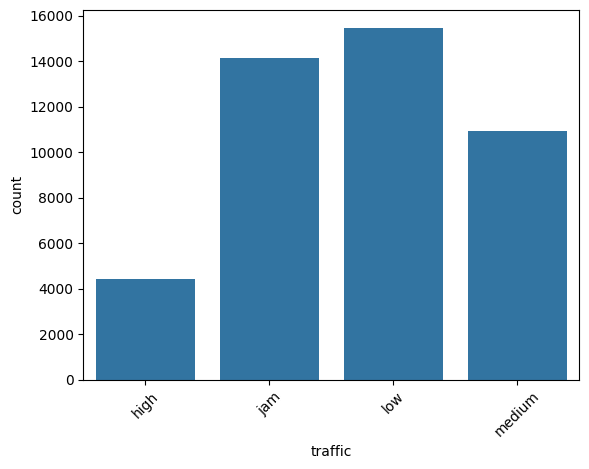

In [ ]:
categorical_analysis(df, 'traffic')

In [ ]:
chi_2_test(df, 'traffic', 'city_type')

2.3390790568495405e-104
Reject the null hypothesis. There is a significant association between traffic and city_type.


In [ ]:
chi_2_test(df, 'traffic', 'city_name')

0.4978080180955253
Fail to reject the null hypothesis. There is no significant association between traffic and city_name.


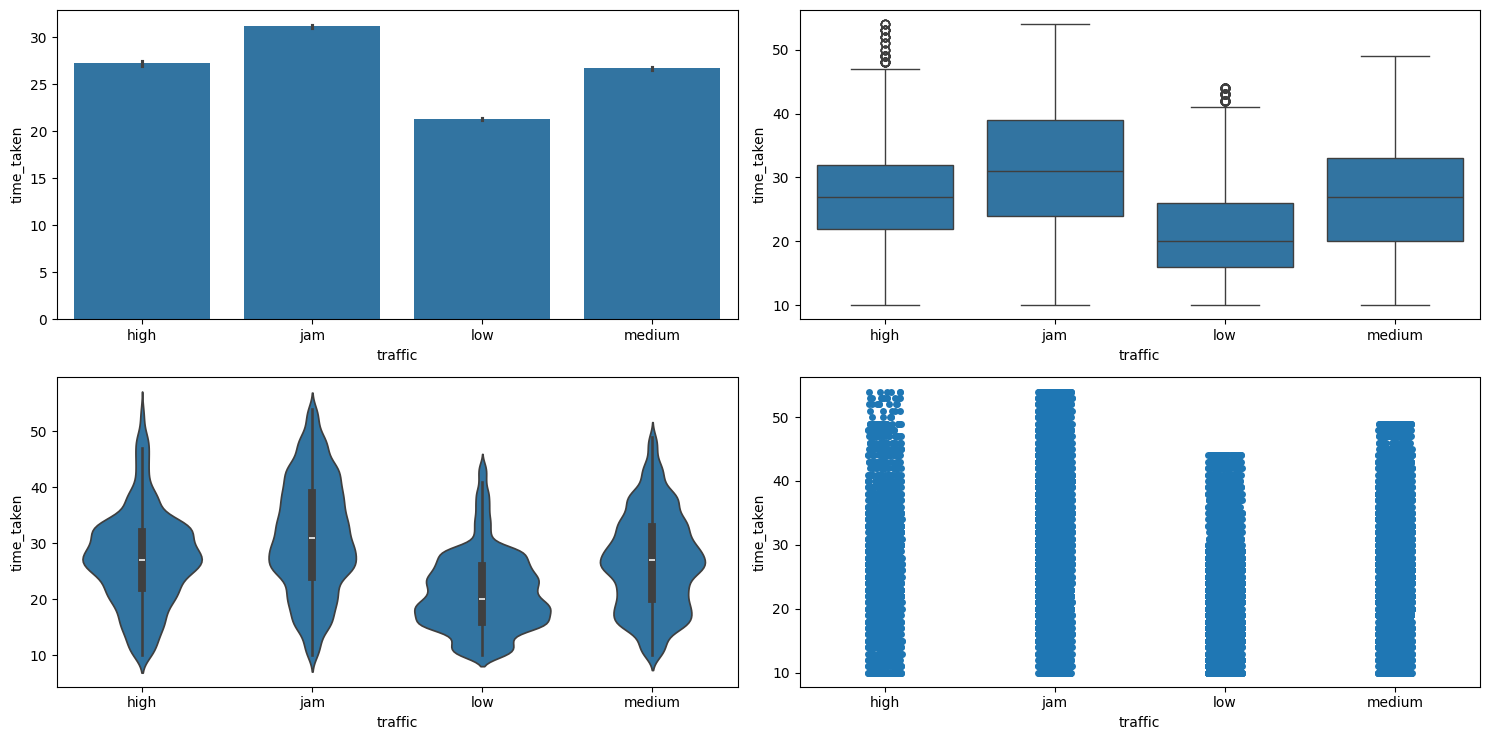

In [ ]:
numerical_categorical_analysis(df, "traffic", "time_taken")

In [ ]:
anova_test(df, "time_taken", "traffic")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and traffic.


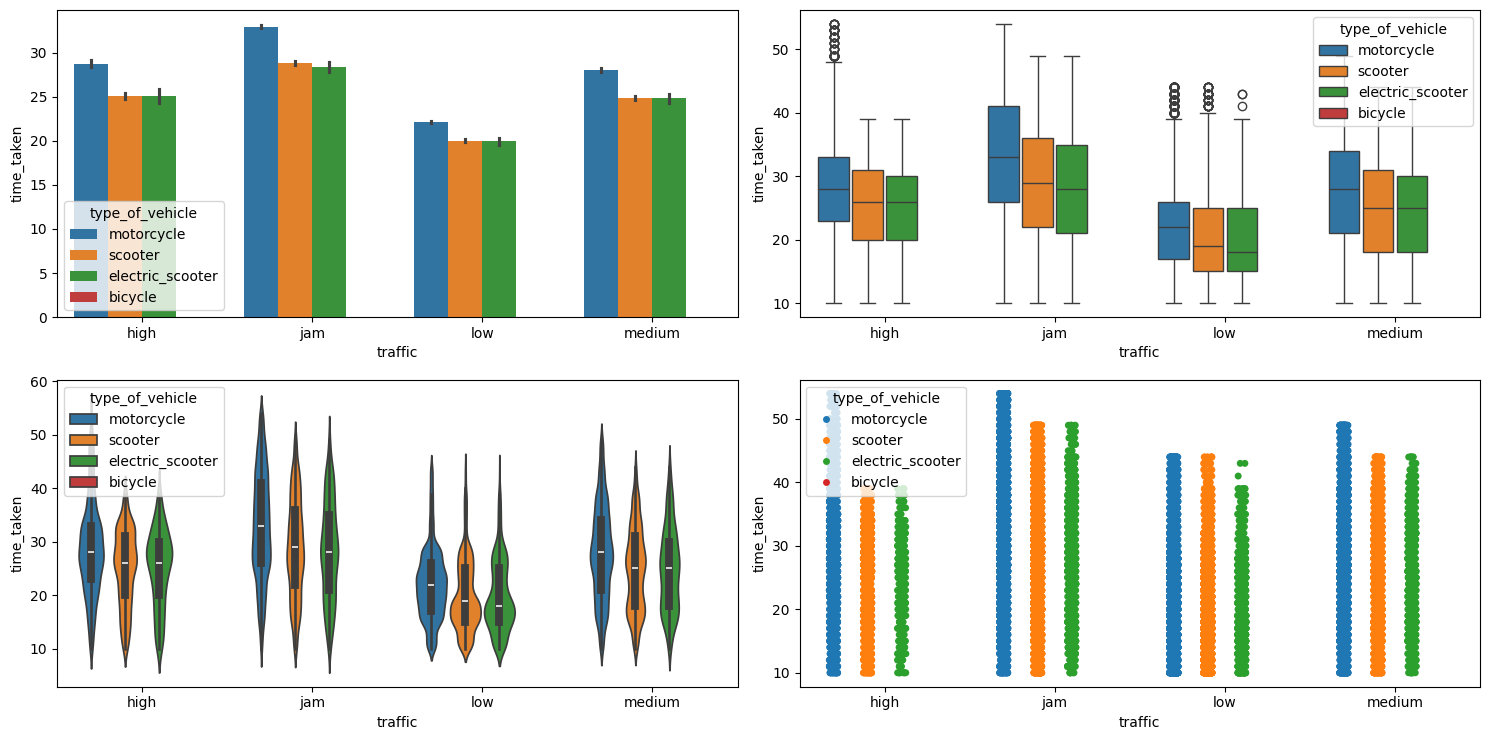

In [ ]:
multivariate_analysis(df, "time_taken", "traffic", "type_of_vehicle")

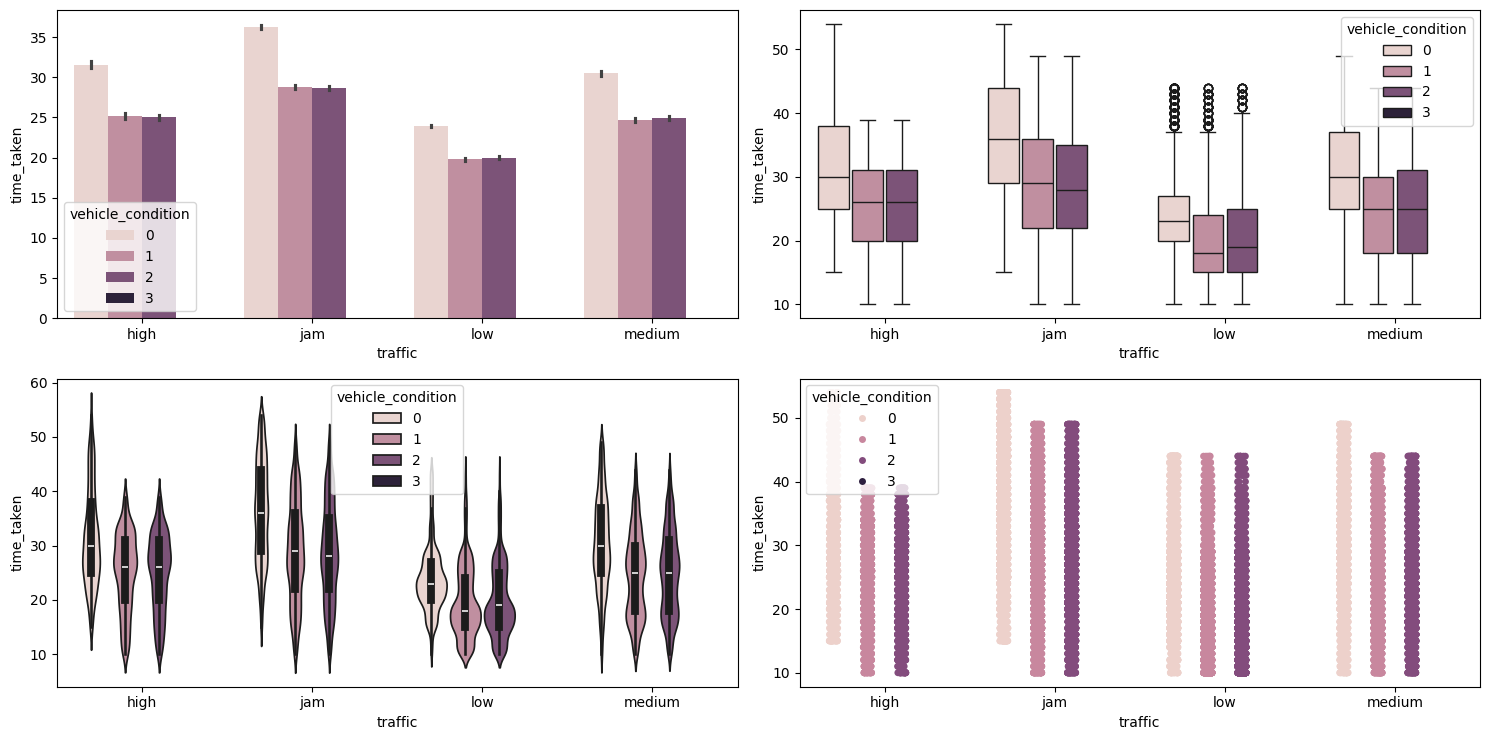

In [ ]:
multivariate_analysis(df, "time_taken", "traffic", "vehicle_condition")

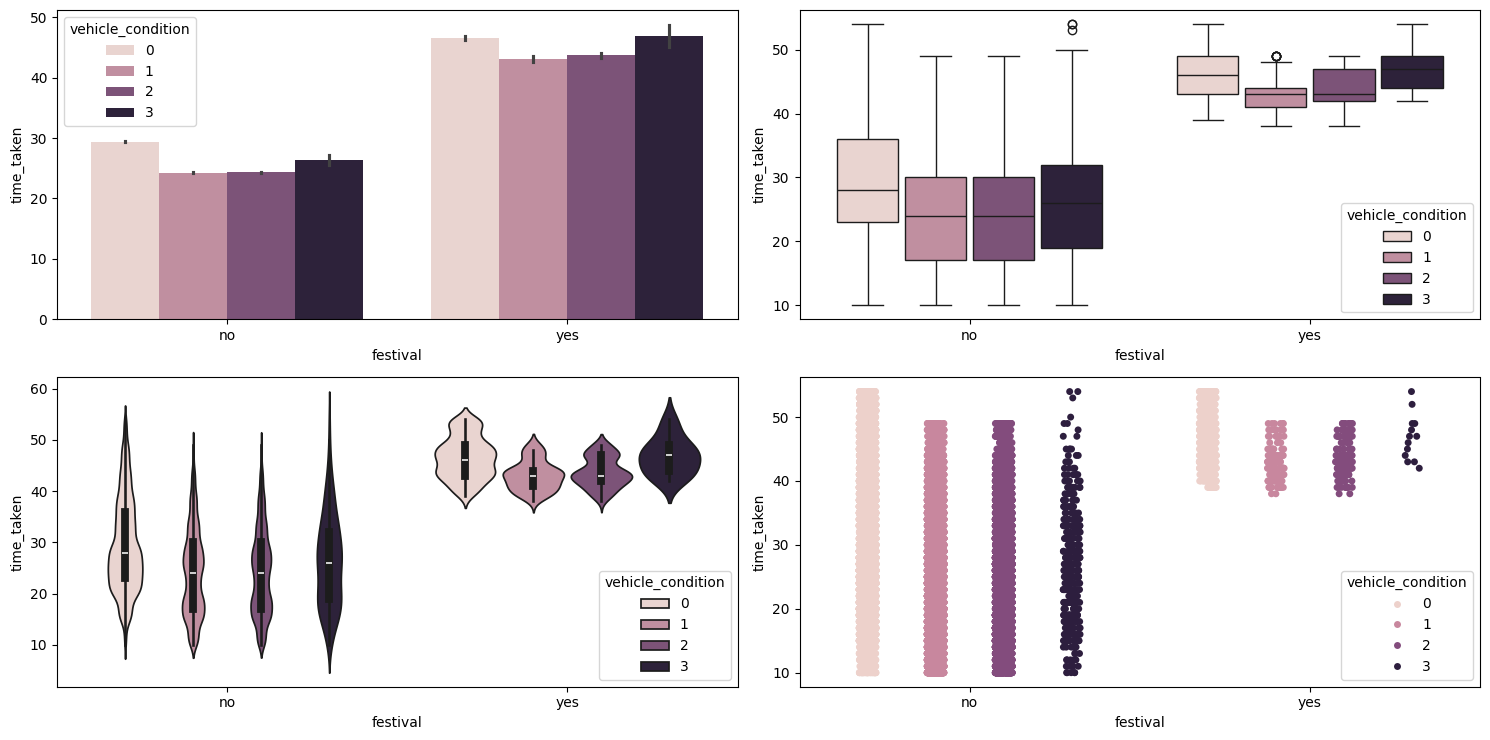

In [ ]:
multivariate_analysis(df, "time_taken", "festival", "vehicle_condition")

Multiple Deliveries

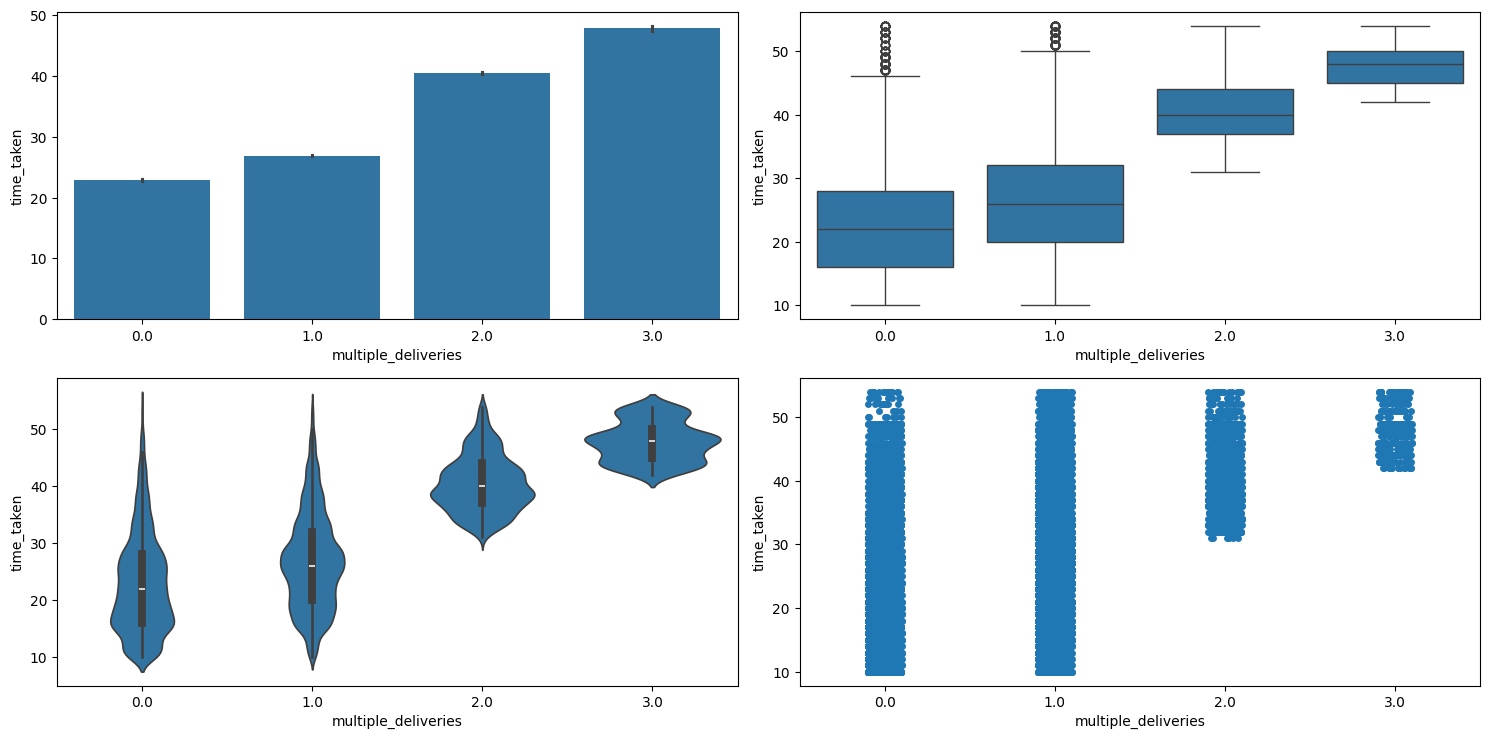

In [ ]:
numerical_categorical_analysis(df, "multiple_deliveries", "time_taken")

In [ ]:
anova_test(df, 'multiple_deliveries', 'time_taken')

0.0
Reject the null hypothesis. There is a significant relationship between multiple_deliveries and time_taken.


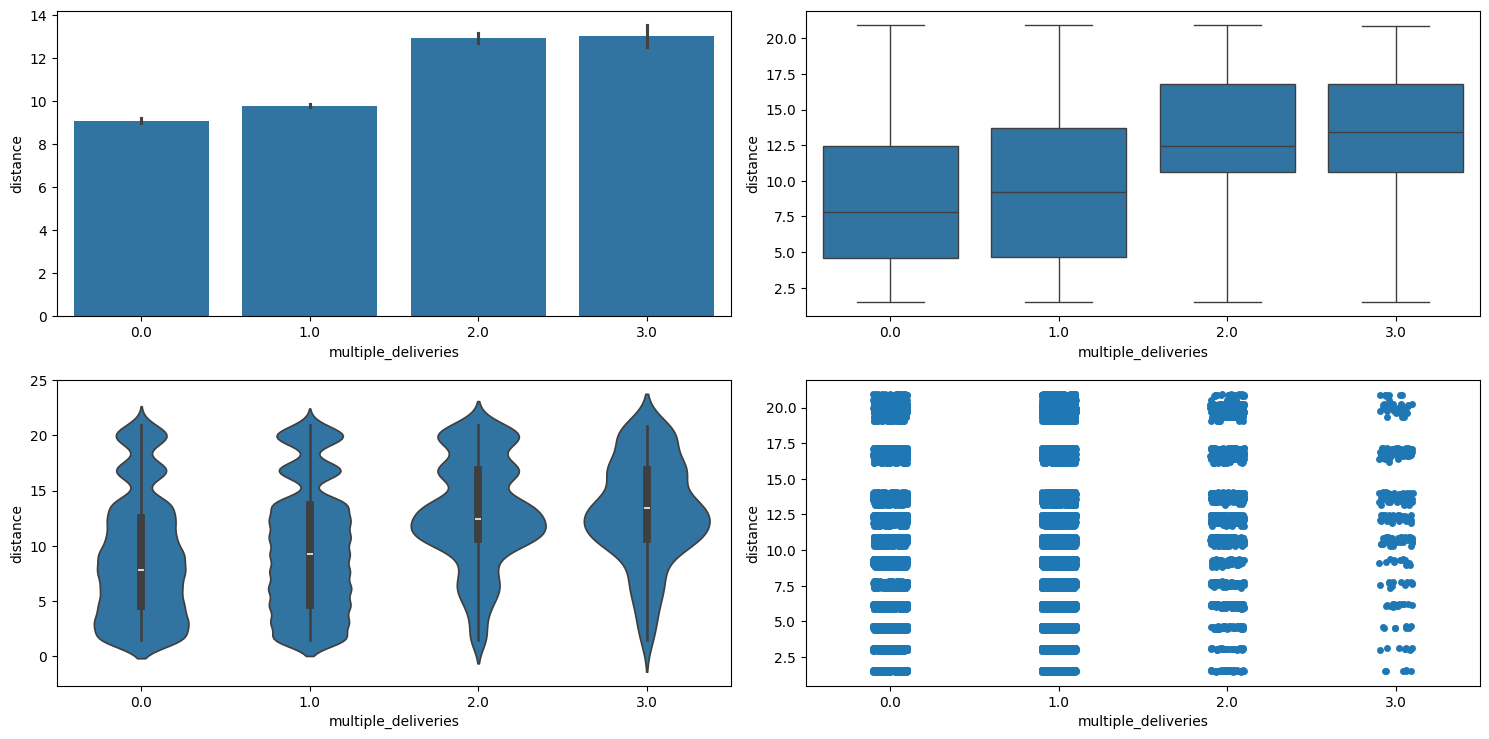

In [ ]:
numerical_categorical_analysis(df, 'multiple_deliveries', 'distance')

Weather

Count Percentage
weather                     
fog          7654     17.02%
stormy       7586     16.87%
cloudy       7536     16.76%
sandstorms   7495     16.66%
windy        7422      16.5%
sunny        7284     16.19%

**************************************************
The unique categories in weather column are ['sunny', 'stormy', 'sandstorms', 'cloudy', 'fog', 'windy', nan]
**************************************************
The number of categories in weather column are 6


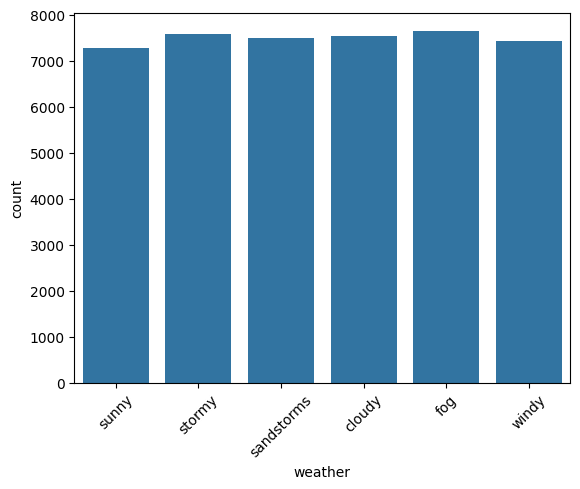

In [ ]:
categorical_analysis(df, "weather")

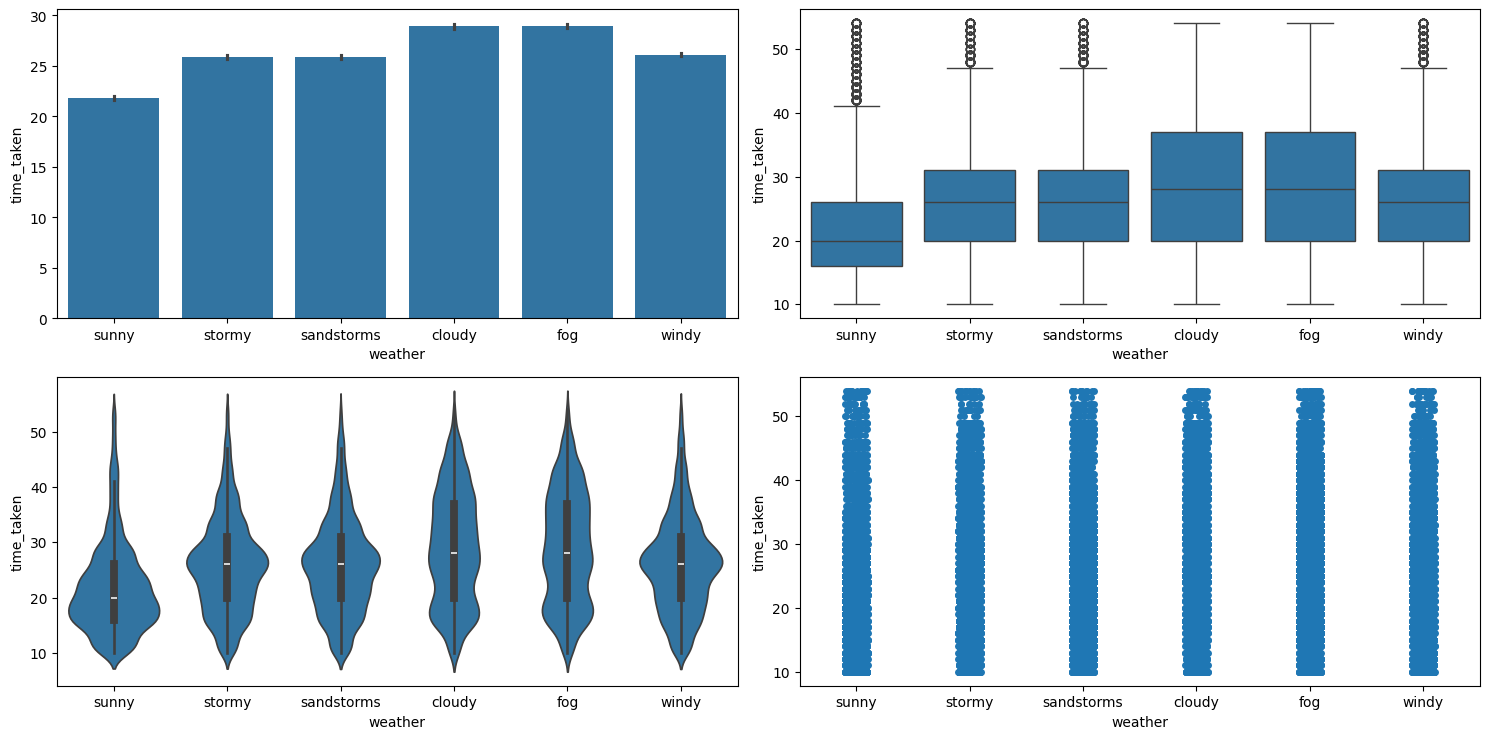

In [ ]:
numerical_categorical_analysis(df, 'weather', 'time_taken')

In [ ]:
anova_test(df, 'time_taken', 'weather')

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and weather.


In [ ]:
chi_2_test(df, 'weather', 'traffic')

0.4796388074753828
Fail to reject the null hypothesis. There is no significant association between weather and traffic.


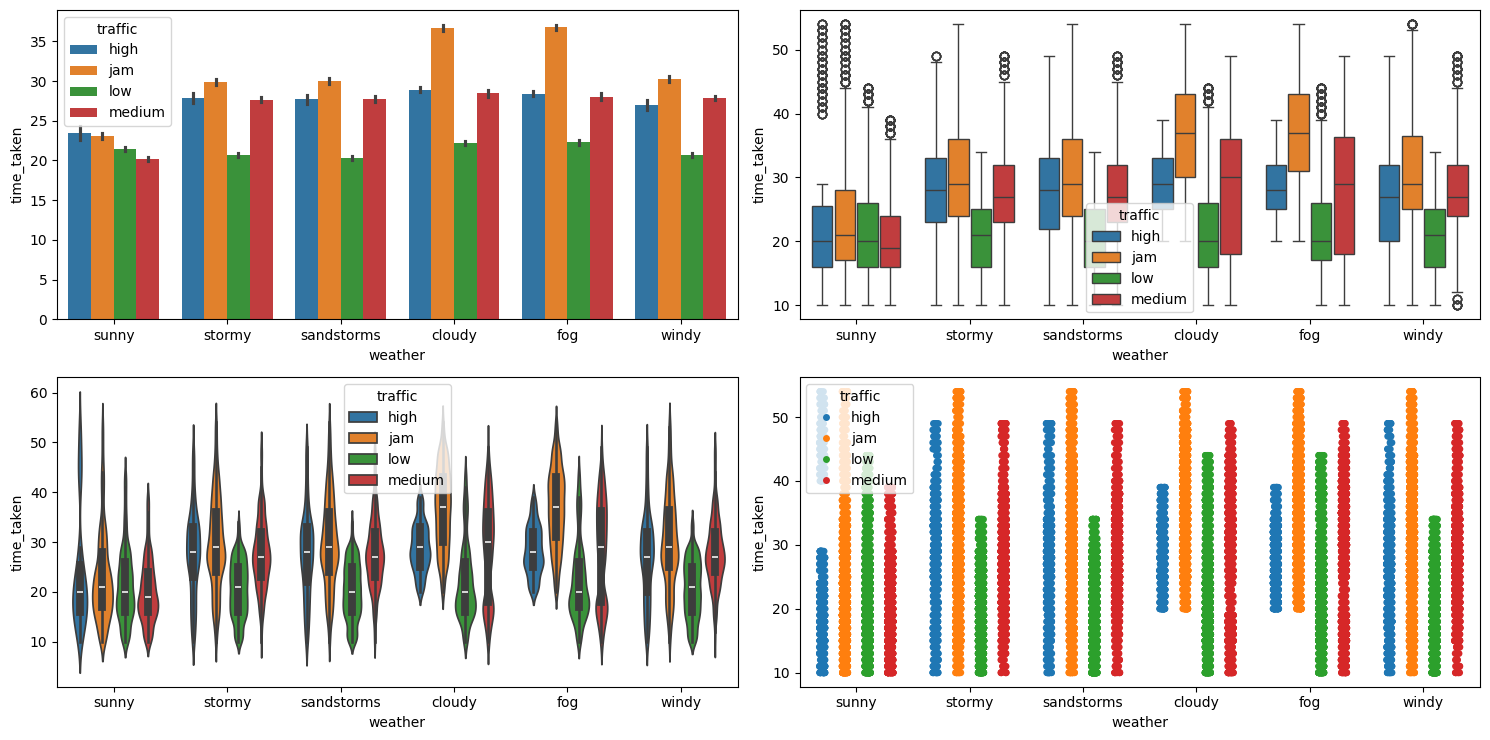

In [ ]:
multivariate_analysis(df, "time_taken", "weather", "traffic")

In [ ]:
df.pivot_table(index="weather",columns="traffic",values="time_taken",aggfunc="mean")

traffic          high        jam        low     medium
weather                                               
cloudy      28.940860  36.689655  22.208445  28.483134
fog         28.426546  36.806916  22.303427  28.044816
sandstorms  27.711840  30.018758  20.297049  27.738522
stormy      27.845839  29.850194  20.681734  27.680502
sunny       23.448980  23.082132  21.449293  20.195518
windy       26.972789  30.219056  20.665862  27.888769

Vehicle Condition and Type

Count Percentage
vehicle_condition                  
2                  15034     33.04%
1                  15030     33.03%
0                  15009     32.99%
3                    429      0.94%

**************************************************
The unique categories in vehicle_condition column are [2, 0, 1, 3]
**************************************************
The number of categories in vehicle_condition column are 4


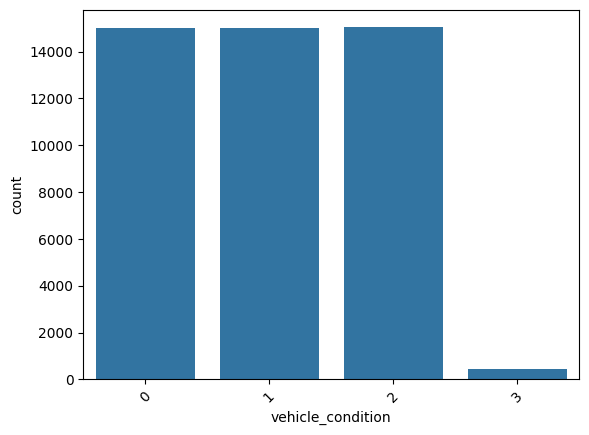

In [ ]:
categorical_analysis(df, "vehicle_condition")

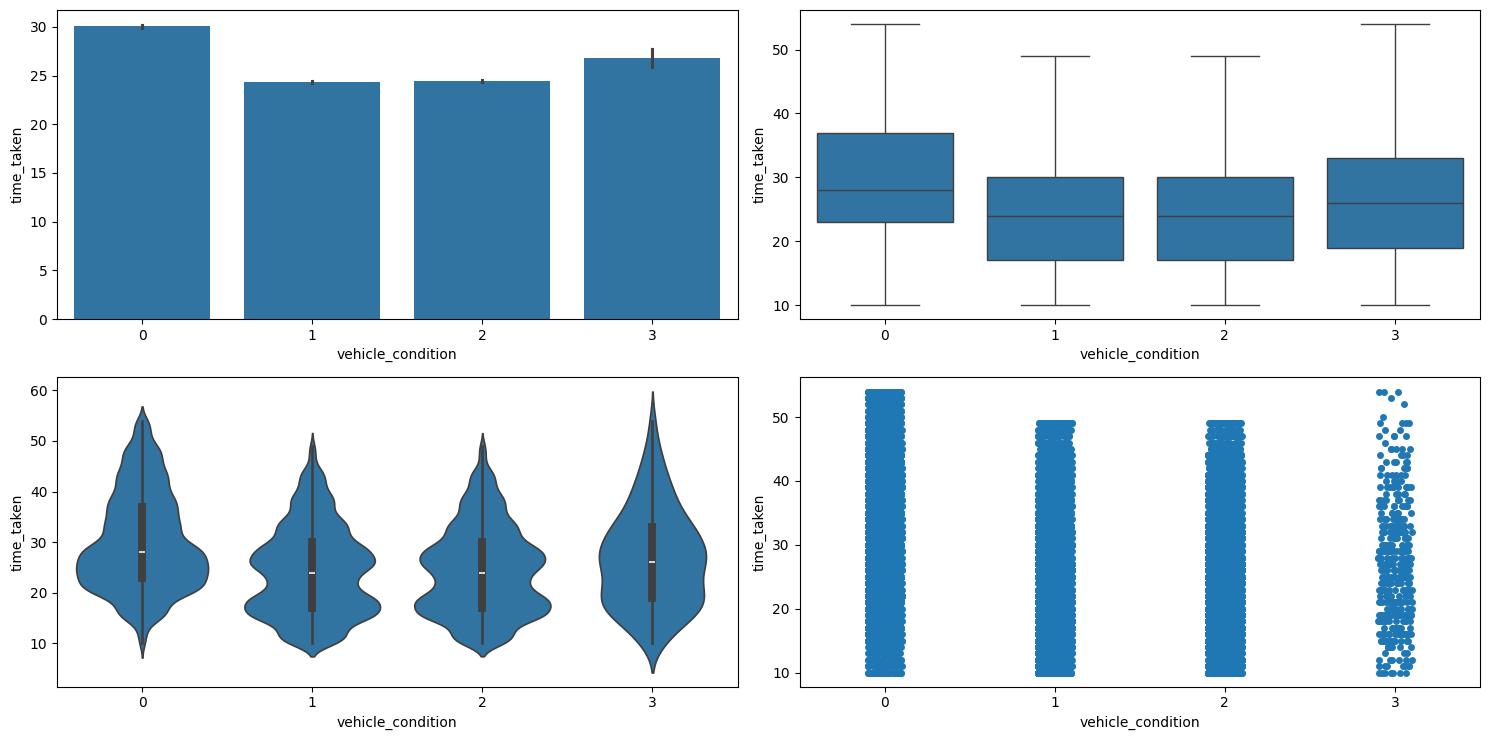

In [ ]:
numerical_categorical_analysis(df, "vehicle_condition", "time_taken")

In [ ]:
anova_test(df, "time_taken", "vehicle_condition")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and vehicle_condition.


Count Percentage
type_of_vehicle                   
motorcycle        26427     58.08%
scooter           15244      33.5%
electric_scooter   3778       8.3%
bicycle              53      0.12%

**************************************************
The unique categories in type_of_vehicle column are ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
**************************************************
The number of categories in type_of_vehicle column are 4


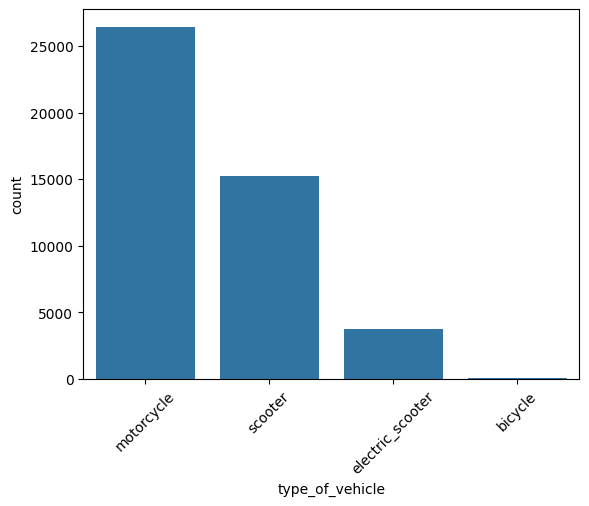

In [ ]:
categorical_analysis(df, "type_of_vehicle")

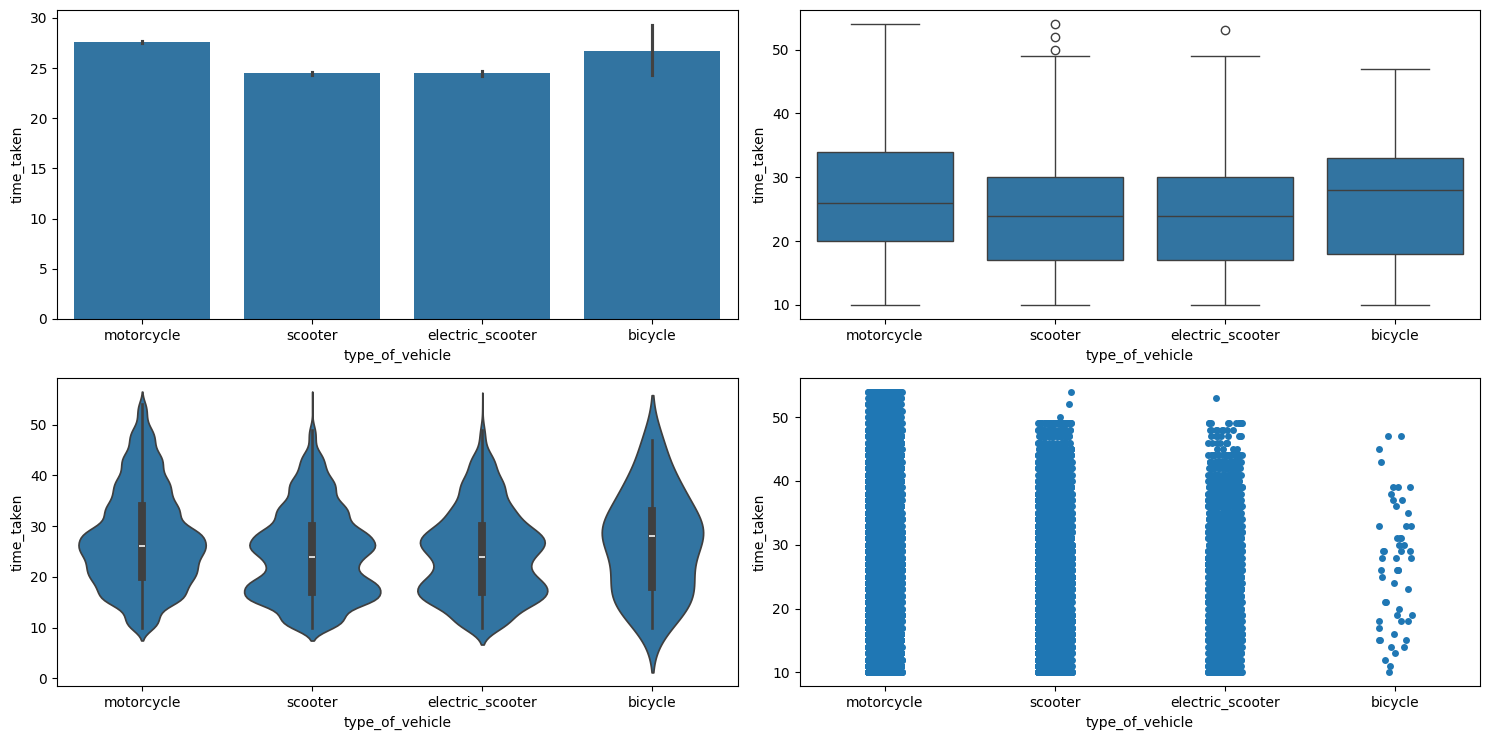

In [ ]:
numerical_categorical_analysis(df, "type_of_vehicle", "time_taken")

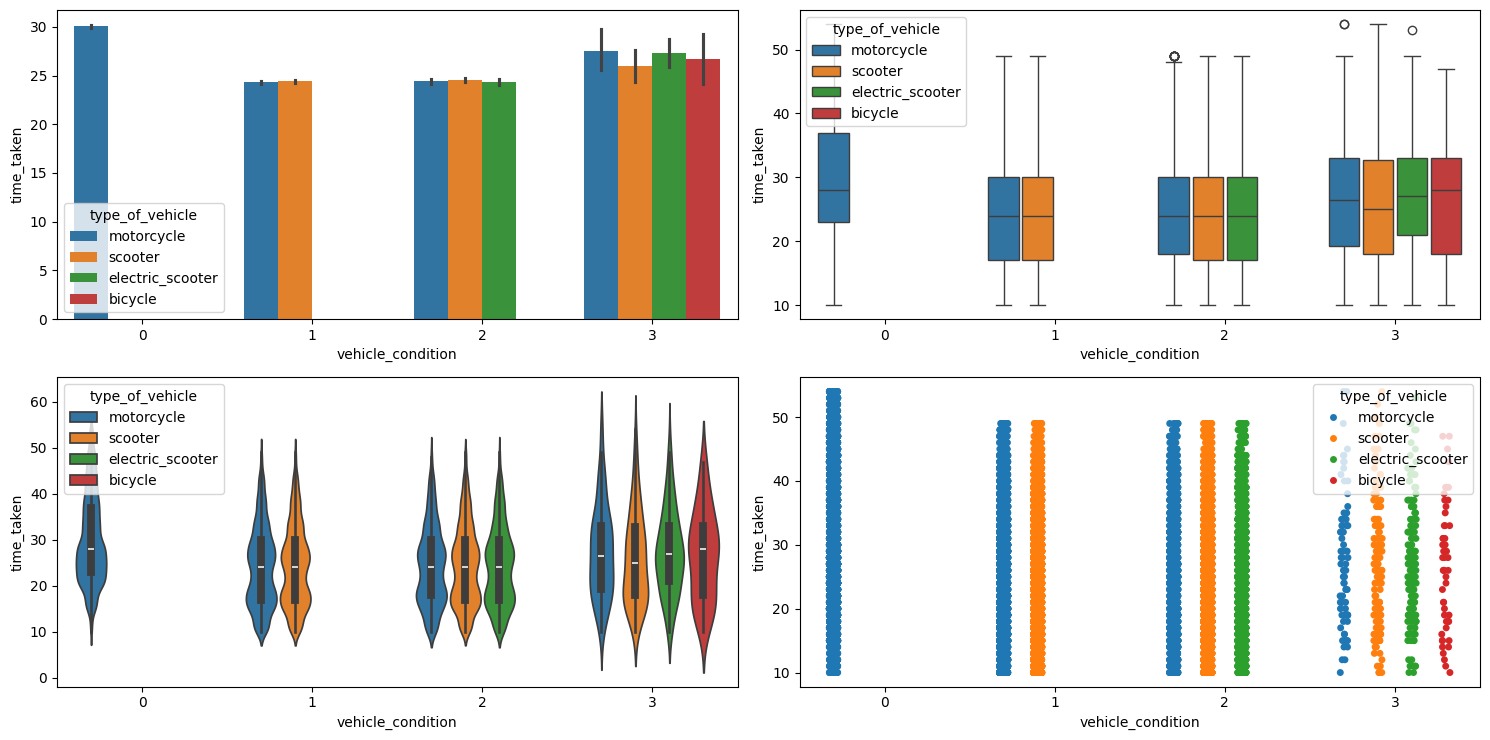

In [ ]:
multivariate_analysis(df, "time_taken", "vehicle_condition", "type_of_vehicle")

In [ ]:
chi_2_test(df, "type_of_vehicle", "vehicle_condition")

0.0
Reject the null hypothesis. There is a significant association between type_of_vehicle and vehicle_condition.


Tyoe of Order

Count Percentage
type_of_order                  
snack          11512      25.3%
meal           11435     25.13%
drinks         11294     24.82%
buffet         11261     24.75%

**************************************************
The unique categories in type_of_order column are ['snack', 'drinks', 'buffet', 'meal']
**************************************************
The number of categories in type_of_order column are 4


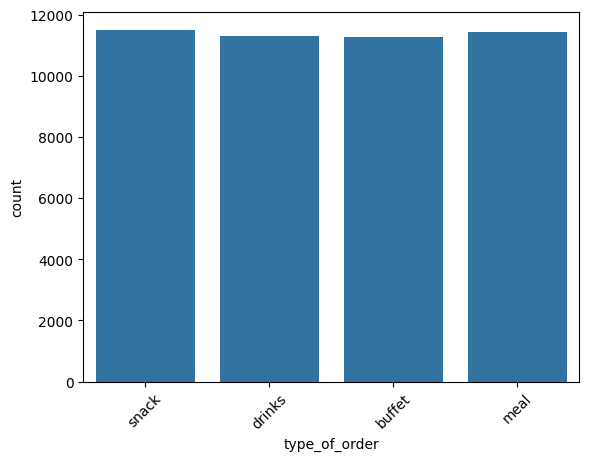

In [ ]:
categorical_analysis(df, "type_of_order")

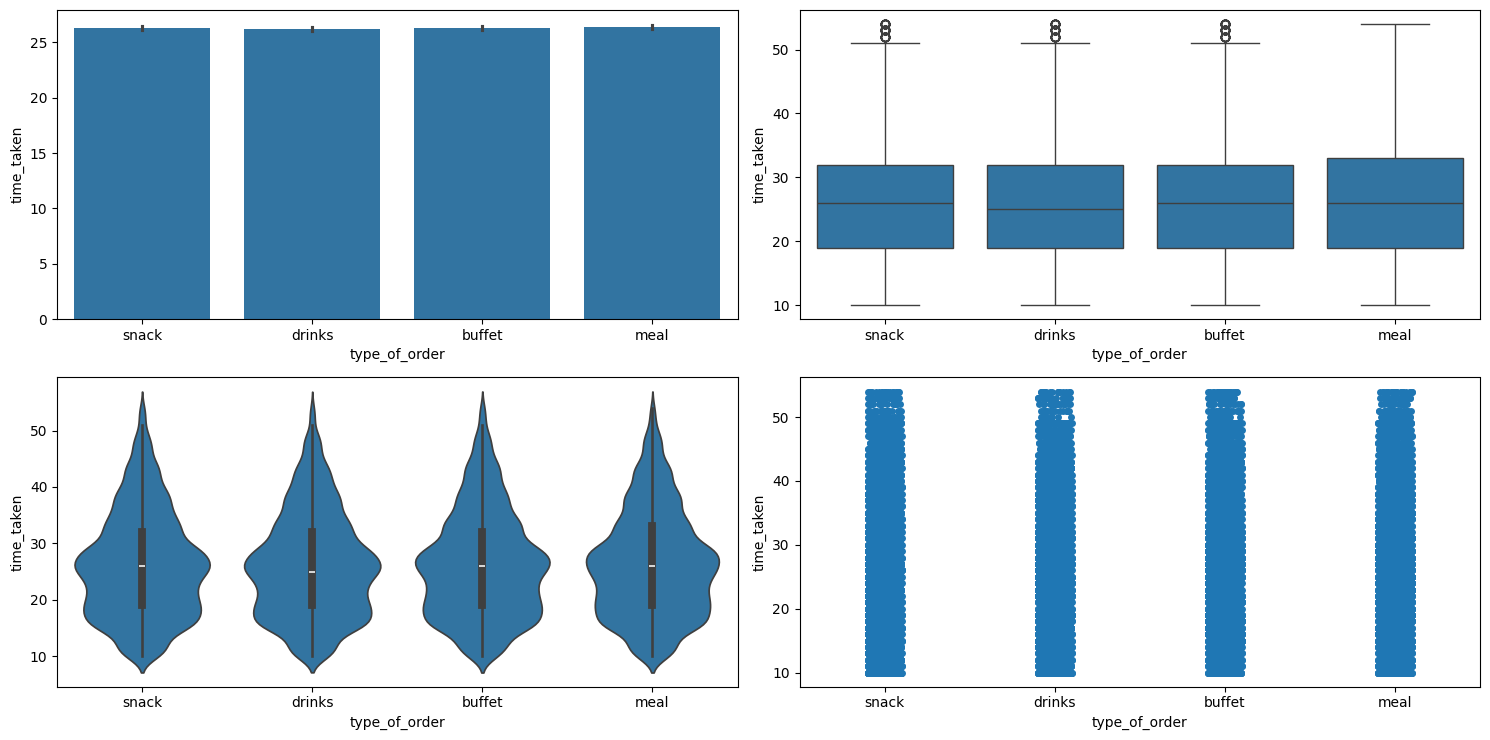

In [ ]:
numerical_categorical_analysis(df, "type_of_order", "time_taken")

In [ ]:
anova_test(df, "time_taken", "type_of_order")

0.3043309877239704
Fail to reject the null hypothesis. There is no significant relationship between time_taken and type_of_order.


In [ ]:
pd.crosstab(df["type_of_order"],df["is_weekend"])

is_weekend        0     1
type_of_order            
buffet         8238  3023
drinks         8130  3164
meal           8290  3145
snack          8337  3175

In [ ]:
chi_2_test(df,"pickup_time_minutes","type_of_order")

0.49118080317709845
Fail to reject the null hypothesis. There is no significant association between pickup_time_minutes and type_of_order.


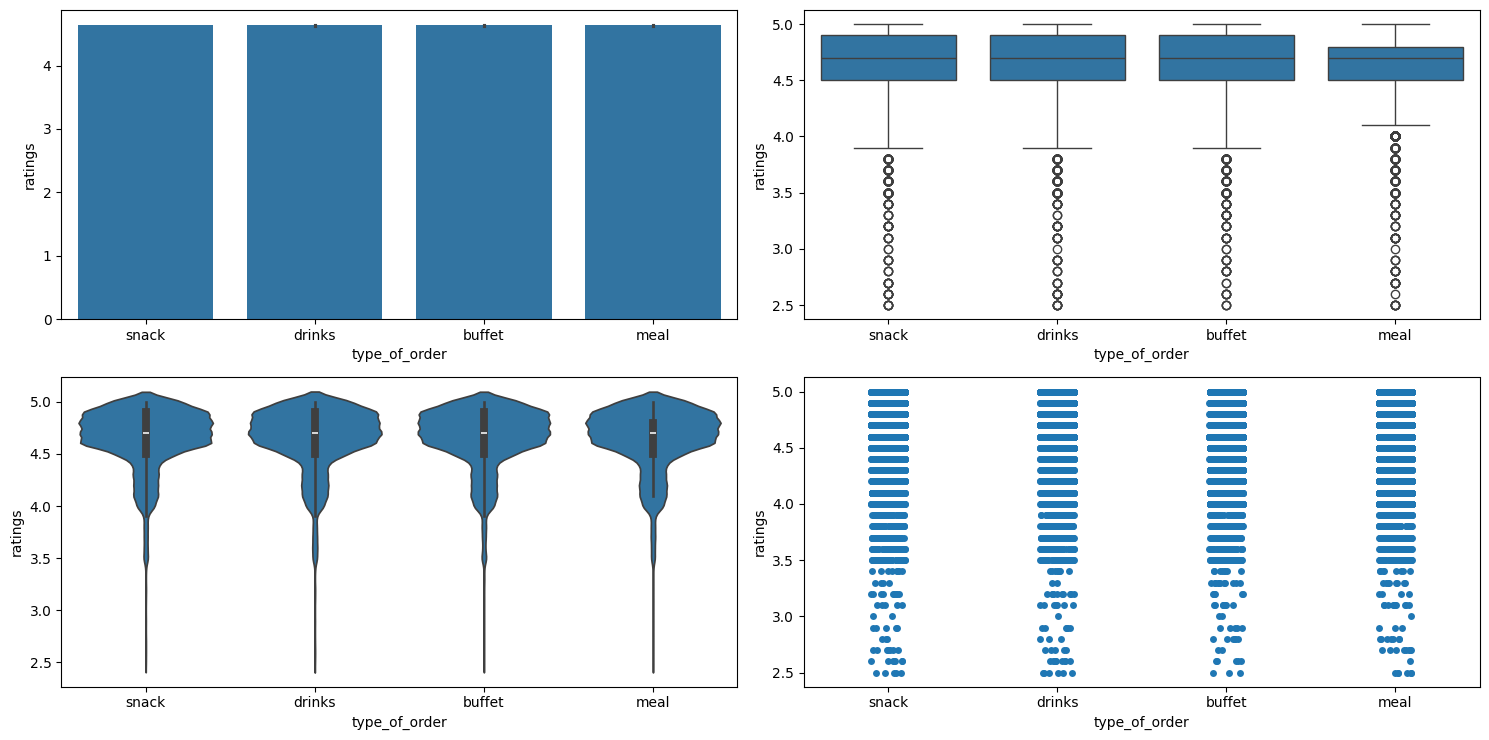

In [ ]:
numerical_categorical_analysis(df, "type_of_order", "ratings")

In [ ]:
chi_2_test(df, "is_weekend", "type_of_order")

0.2658161540207276
Fail to reject the null hypothesis. There is no significant association between is_weekend and type_of_order.


In [ ]:
chi_2_test(df, "festival", "type_of_order")

0.6149018072722126
Fail to reject the null hypothesis. There is no significant association between festival and type_of_order.


City Name

Count Percentage
city_name                  
JAP         3439      7.56%
RANCHI      3222      7.08%
BANG        3184       7.0%
SUR         3182      6.99%
HYD         3177      6.98%
MUM         3168      6.96%
MYS         3164      6.95%
COIMB       3162      6.95%
VAD         3159      6.94%
INDO        3154      6.93%
CHEN        3132      6.88%
PUNE        3129      6.88%
AGR          761      1.67%
LUDH         758      1.67%
ALH          738      1.62%
KNP          737      1.62%
DEH          735      1.62%
GOA          709      1.56%
AURG         703      1.54%
KOC          701      1.54%
KOL          699      1.54%
BHP          689      1.51%

**************************************************
The unique categories in city_name column are ['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA', 'AURG', 'AGR', 'VAD', 'ALH', 'BHP']
**************************************************
The number of categories in city_name column are 22


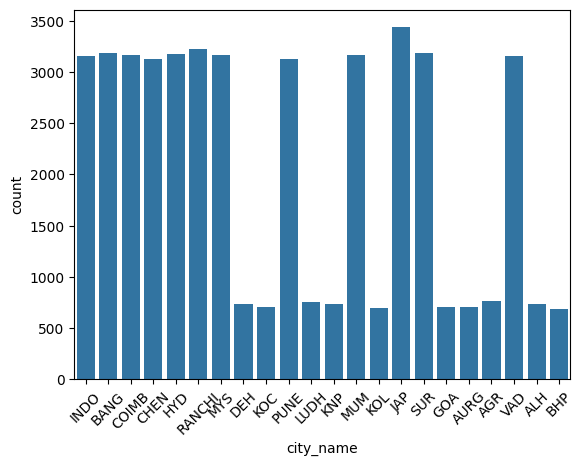

In [ ]:
categorical_analysis(df, "city_name")

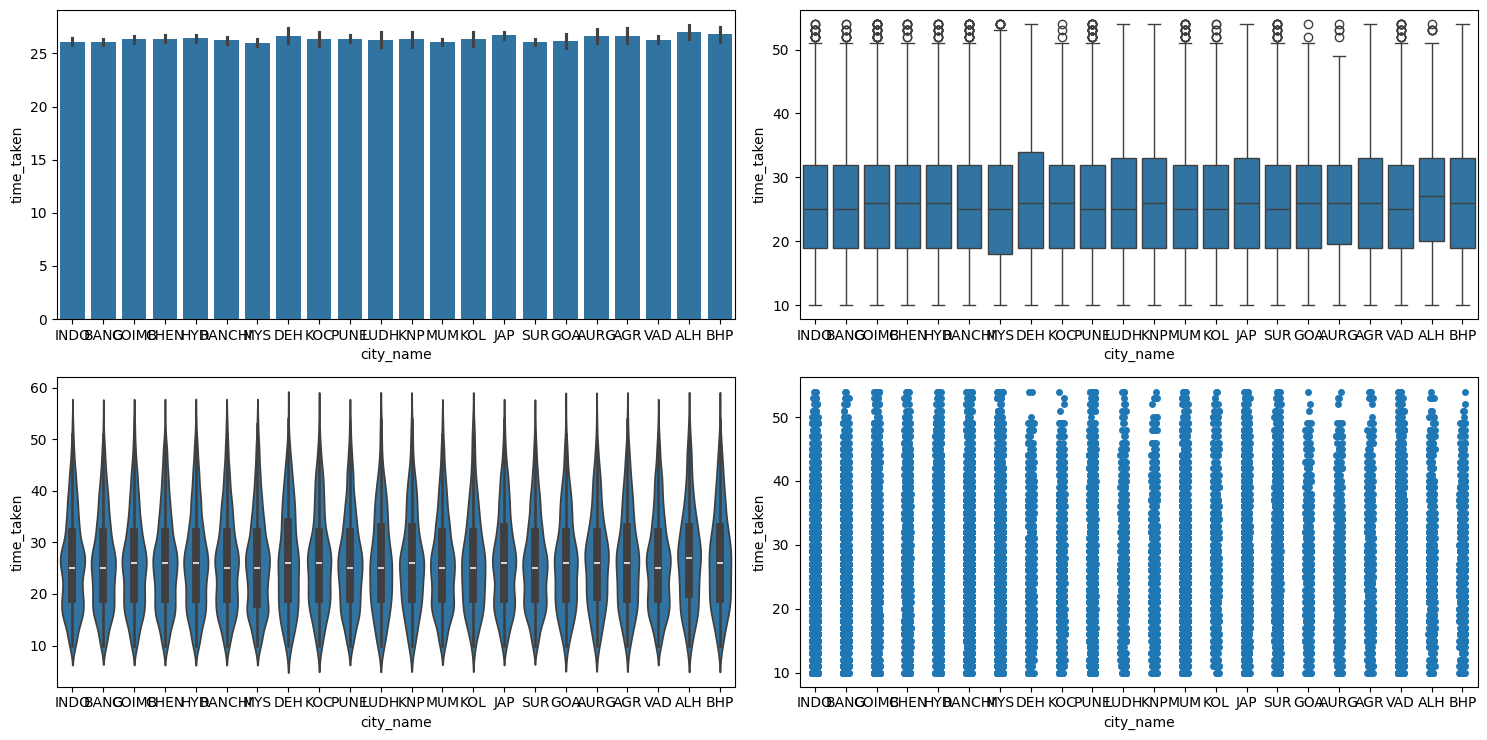

In [ ]:
numerical_categorical_analysis(df, "city_name", "time_taken")

Count Percentage
city_type                      
metropolitian  34029     76.81%
urban          10111     22.82%
semi-urban       164      0.37%

**************************************************
The unique categories in city_type column are ['urban', 'metropolitian', 'semi-urban', nan]
**************************************************
The number of categories in city_type column are 3


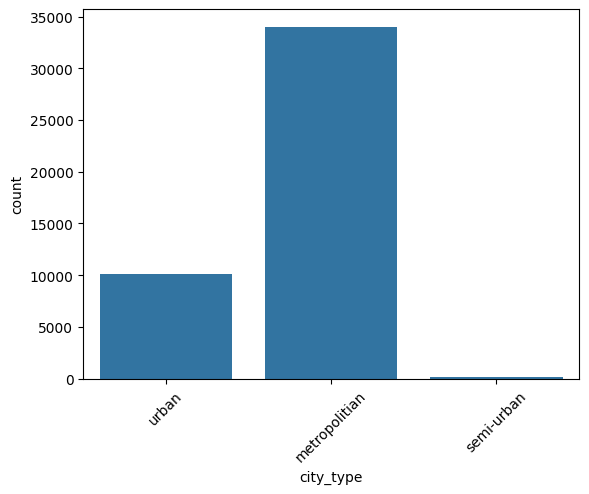

In [ ]:
categorical_analysis(df, "city_type")

In [ ]:
anova_test(df, "time_taken", "city_type")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and city_type.


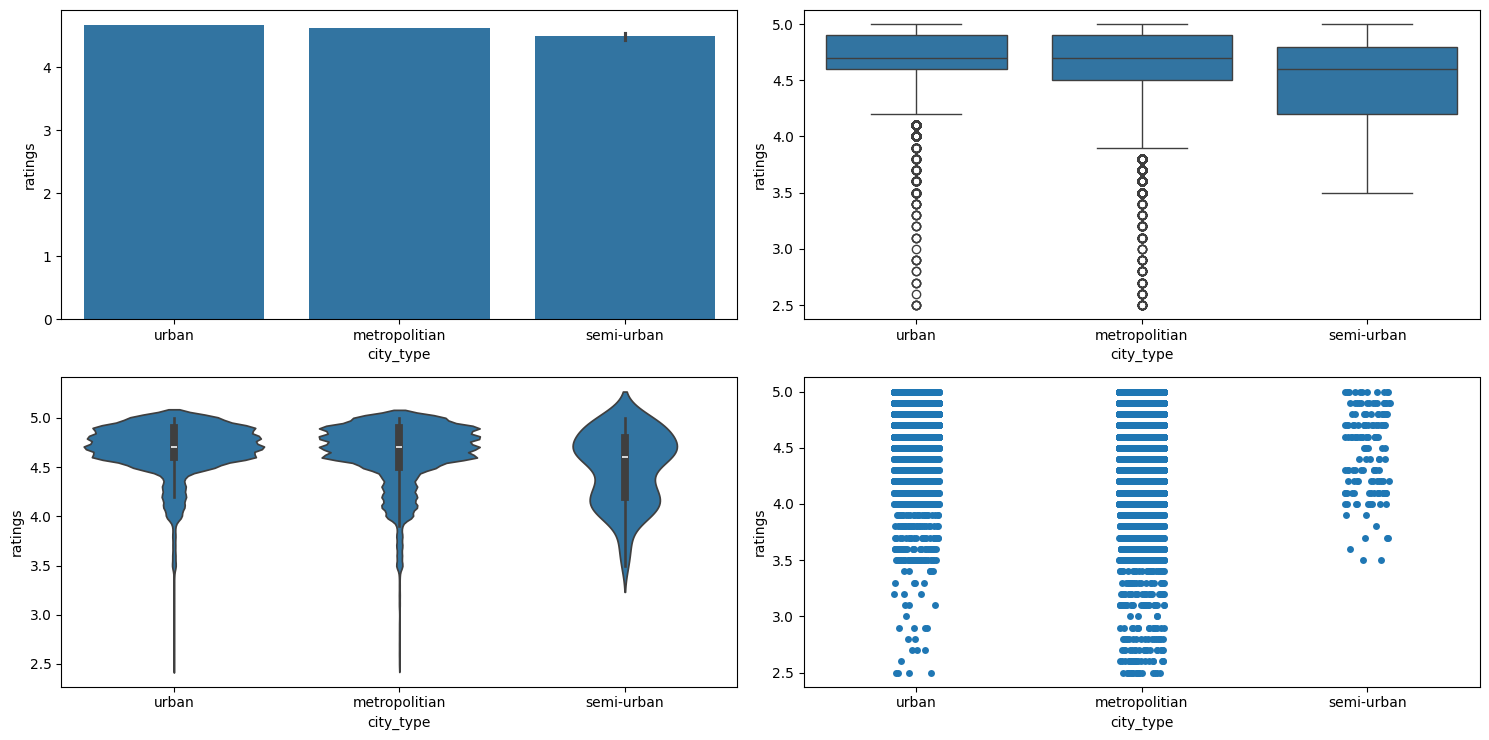

In [ ]:
numerical_categorical_analysis(df, "city_type", "ratings")

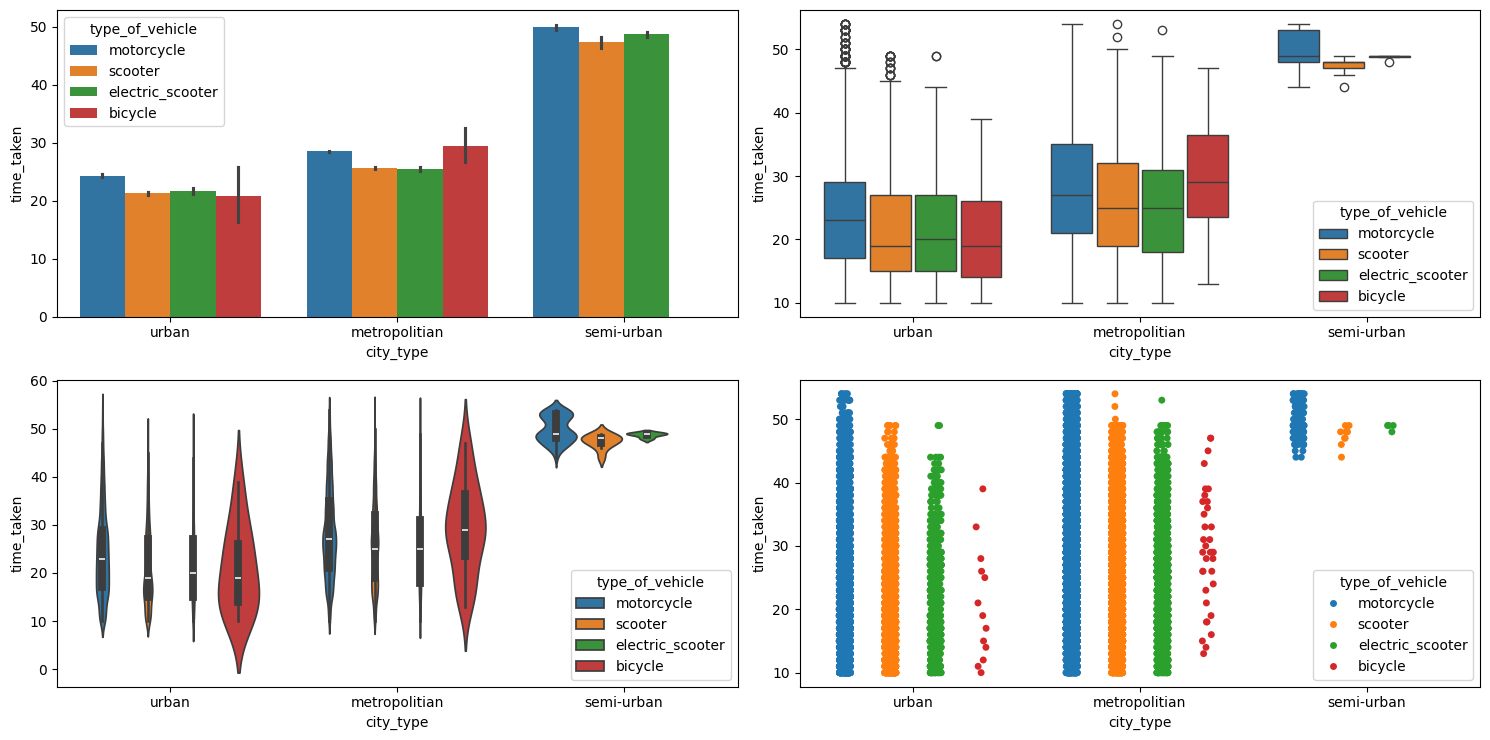

In [ ]:
multivariate_analysis(df, "time_taken", "city_type", "type_of_vehicle")

Distance

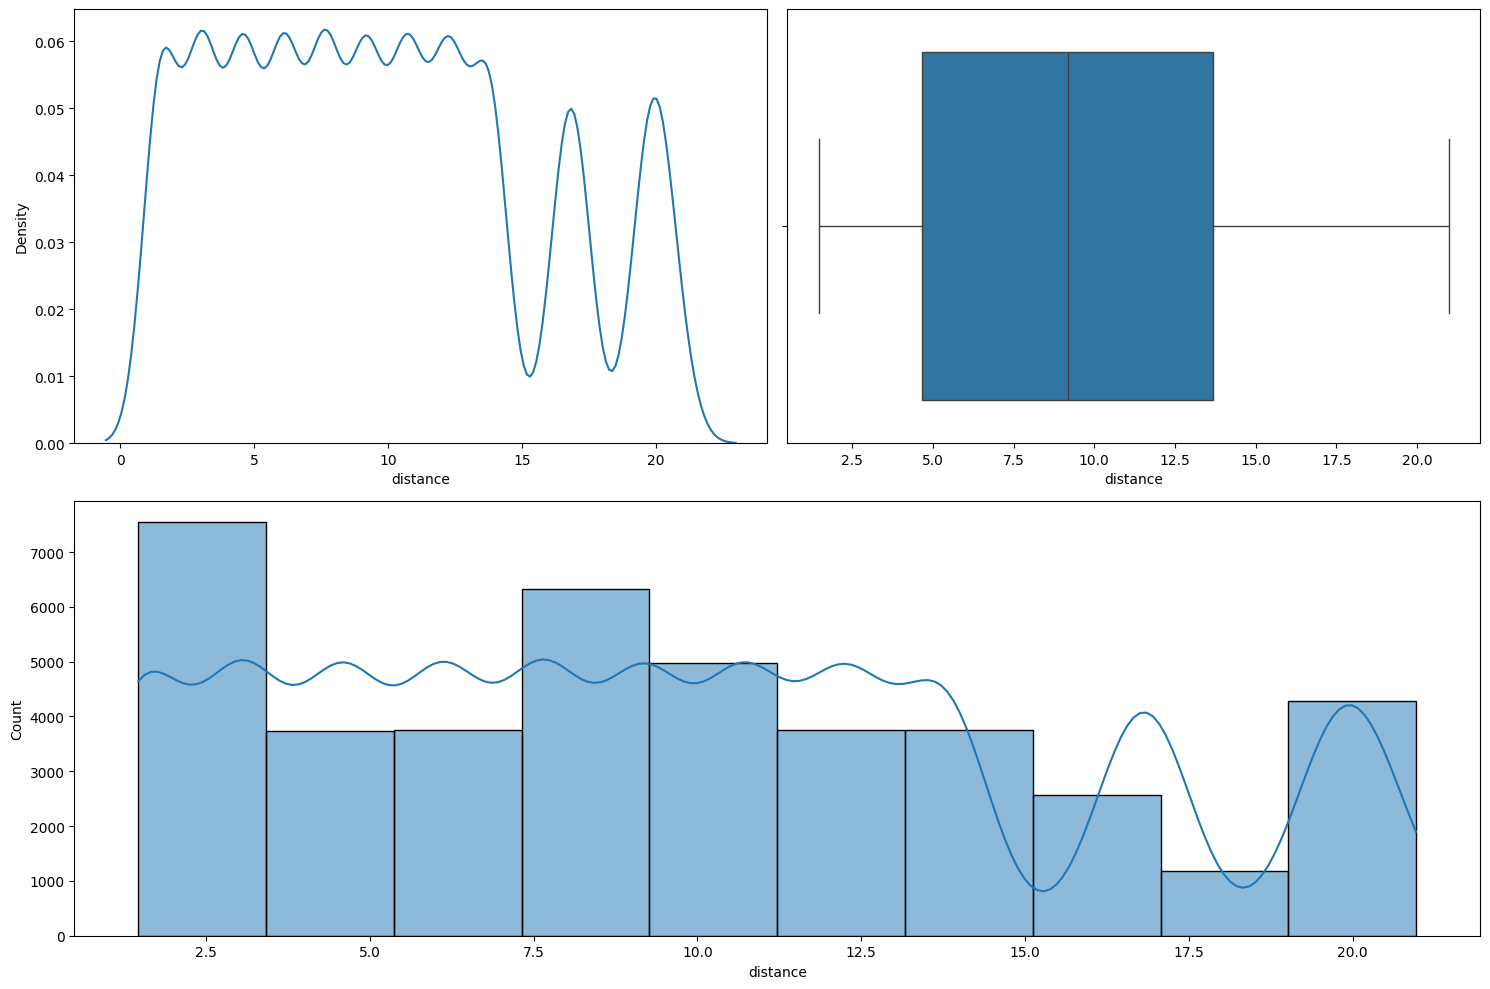

In [ ]:
numerical_analysis(df, "distance",bins=10)

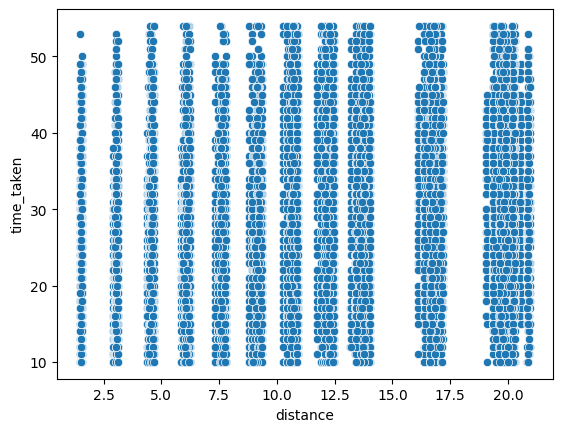

In [ ]:
sns.scatterplot(df,x="distance",y="time_taken")
plt.show()

In [ ]:
df[["distance","time_taken"]].corr()

distance  time_taken
distance    1.000000    0.320705
time_taken  0.320705    1.000000

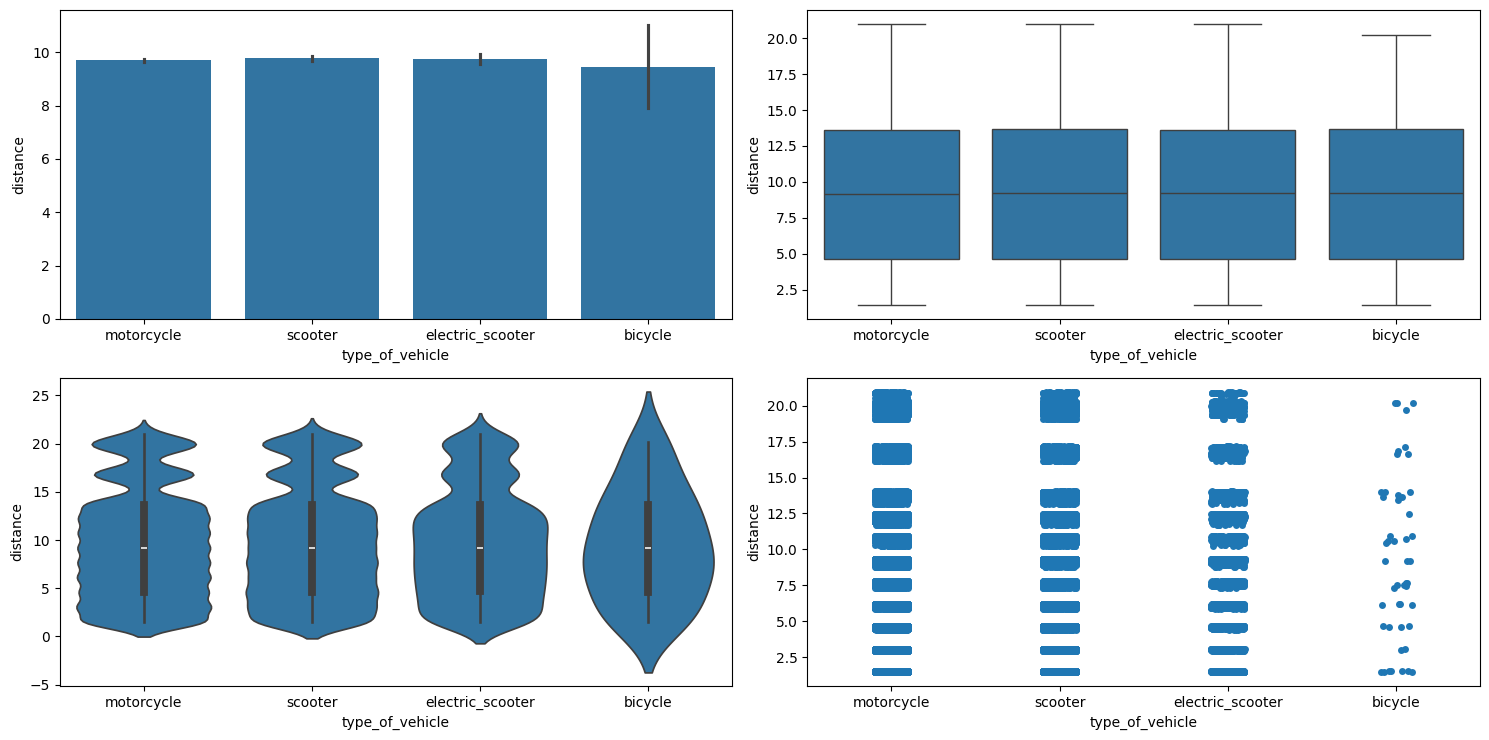

In [ ]:
numerical_categorical_analysis(df, "type_of_vehicle", "distance")

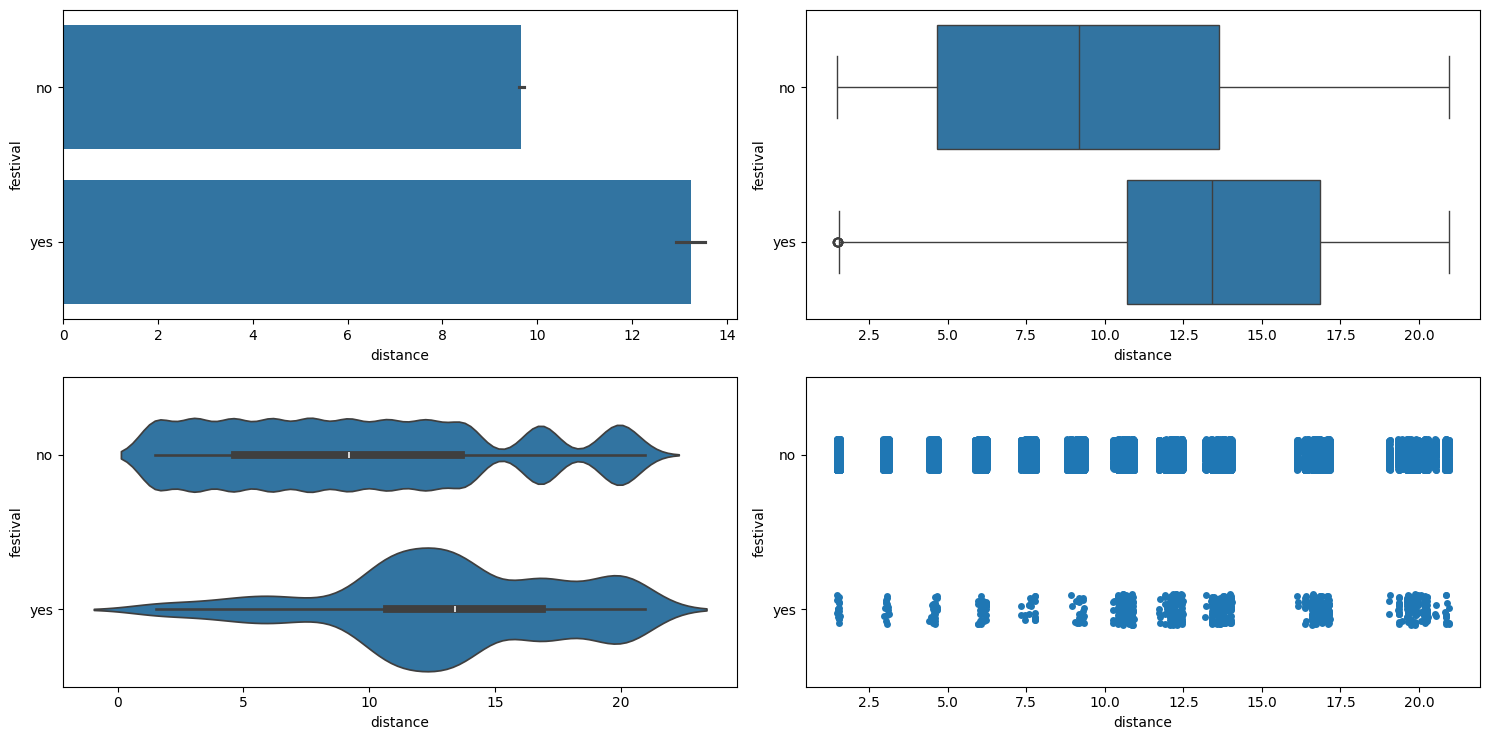

In [ ]:
numerical_categorical_analysis(df, "distance", "festival")

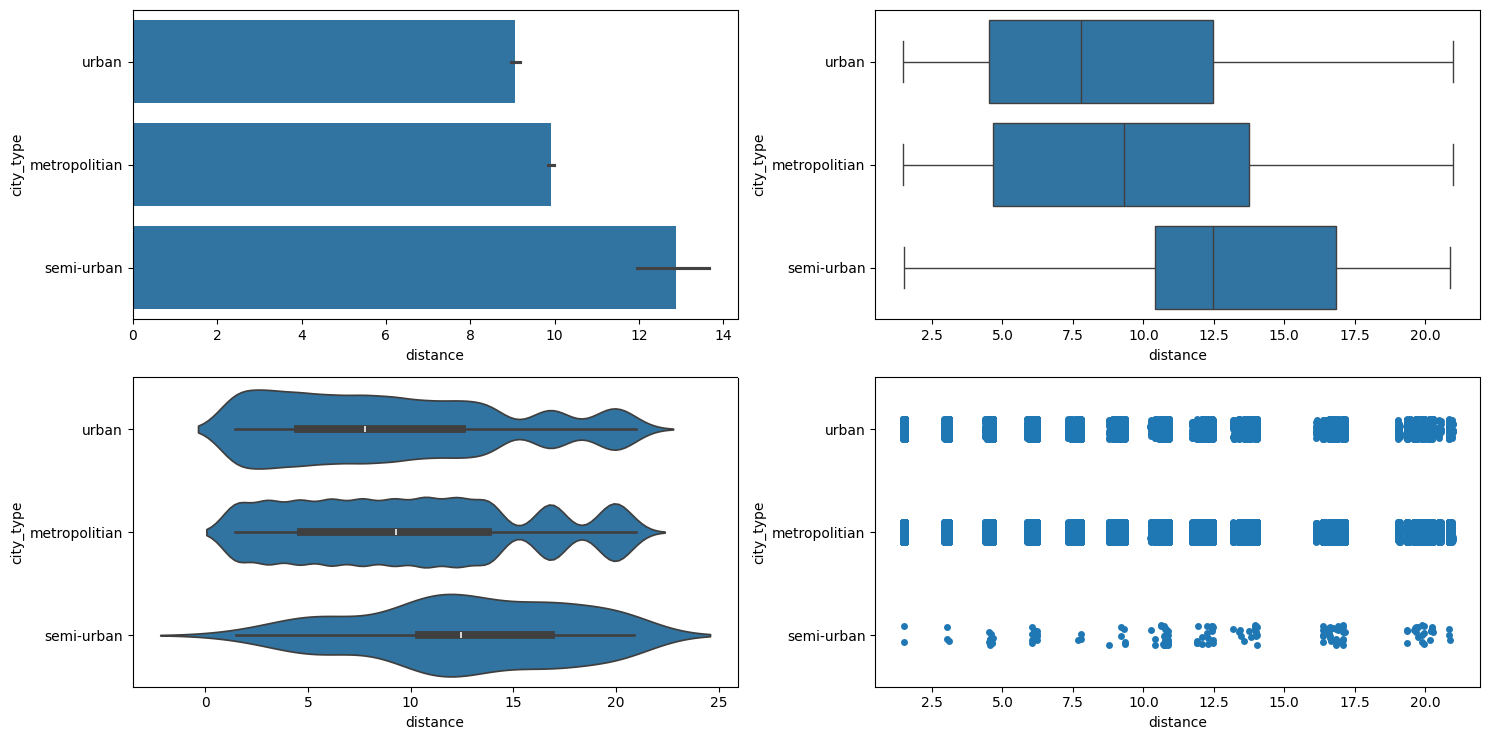

In [ ]:
numerical_categorical_analysis(df, "distance", "city_type")

In [ ]:
df = df.assign(distance_type = pd.cut(df["distance"],bins=[0,5,10,15,25],right=False,labels=["short","medium","long","very_long"]))

In [ ]:
df

rider_id   age  ratings  restaurant_latitude  \
0        INDORES13DEL02   37.0      4.9            22.745049   
1        BANGRES18DEL02   34.0      4.5            12.913041   
2        BANGRES19DEL01   23.0      4.4            12.914264   
3       COIMBRES13DEL02   38.0      4.7            11.003669   
4        CHENRES12DEL01   32.0      4.6            12.972793   
...                  ...   ...      ...                  ...   
45497     JAPRES04DEL01   30.0      4.8            26.902328   
45498     AGRRES16DEL01   21.0      4.6                  NaN   
45499    CHENRES08DEL03   30.0      4.9            13.022394   
45500   COIMBRES11DEL01   20.0      4.7            11.001753   
45501  RANCHIRES09DEL02   23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 75.892471          22.765049           75.912471   
1                 77.683237          13.043041           77.813237   
2                 77.678400          12.924264           77.688400   
3                 76.976494          11.053669           77.026494   
4                 80.249982          13.012793           80.289982   
...                     ...                ...                 ...   
45497             75.794257          26.912328           75.804257   
45498                   NaN                NaN                 NaN   
45499             80.242439          13.052394           80.272439   
45500             76.986241          11.041753           77.026241   
45501             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  order_day order_month  \
0      2022-03-19       sunny    high  ...         19           3   
1      2022-03-25      stormy     jam  ...         25           3   
2      2022-03-19  sandstorms     low  ...         19           3   
3      2022-04-05       sunny  medium  ...          5           4   
4      2022-03-26      cloudy    high  ...         26           3   
...           ...         ...     ...  ...        ...         ...   
45497  2022-03-24       windy    high  ...         24           3   
45498  2022-02-16       windy     jam  ...         16           2   
45499  2022-03-11      cloudy     low  ...         11           3   
45500  2022-03-07      cloudy    high  ...          7           3   
45501  2022-03-02         fog  medium  ...          2           3   

      order_day_of_week  is_weekend pickup_time_minutes order_time_hour  \
0              saturday           1                15.0            11.0   
1                friday           0                 5.0            19.0   
2              saturday           1                15.0             8.0   
3               tuesday           0                10.0            18.0   
4              saturday           1                15.0            13.0   
...                 ...         ...                 ...             ...   
45497          thursday           0                10.0            11.0   
45498         wednesday           0                15.0            19.0   
45499            friday           0                15.0            23.0   
45500            monday           0                 5.0            13.0   
45501         wednesday           0                 5.0            17.0   

       order_time_of_day   distance  distance_type  time_taken_pt  
0                morning   3.025149          short      -0.130153  
1                evening  20.183530      very_long       0.775092  
2                morning   1.552758          short       0.088493  
3                evening   7.790401         medium      -0.482135  
4              afternoon   6.210138         medium       0.494134  
...                  ...        ...            ...            ...  
45497            morning   1.489846          short       0.683422  
45498            evening        NaN            NaN       1.039335  
45499              night   4.657195          short      -1.15149

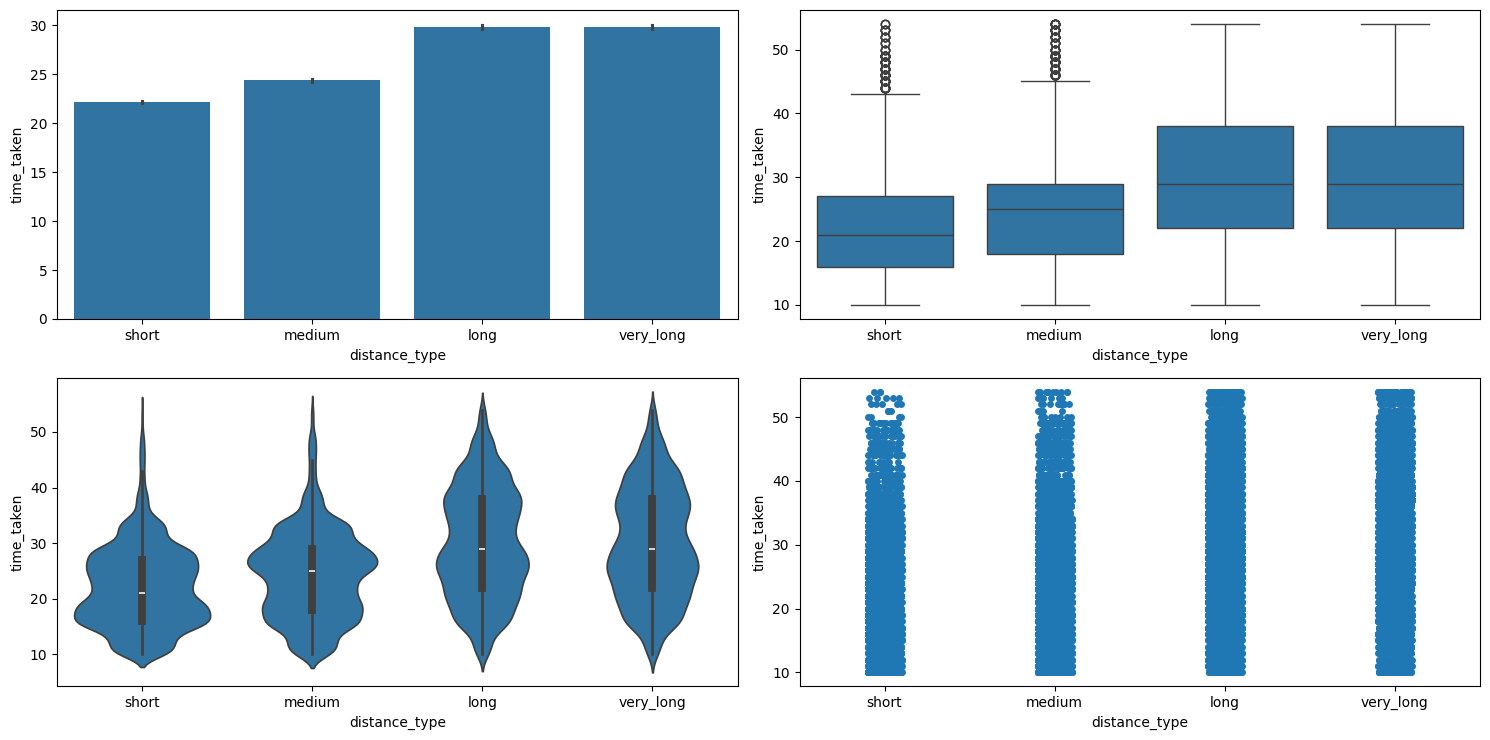

In [ ]:
numerical_categorical_analysis(df, "distance_type", "time_taken")

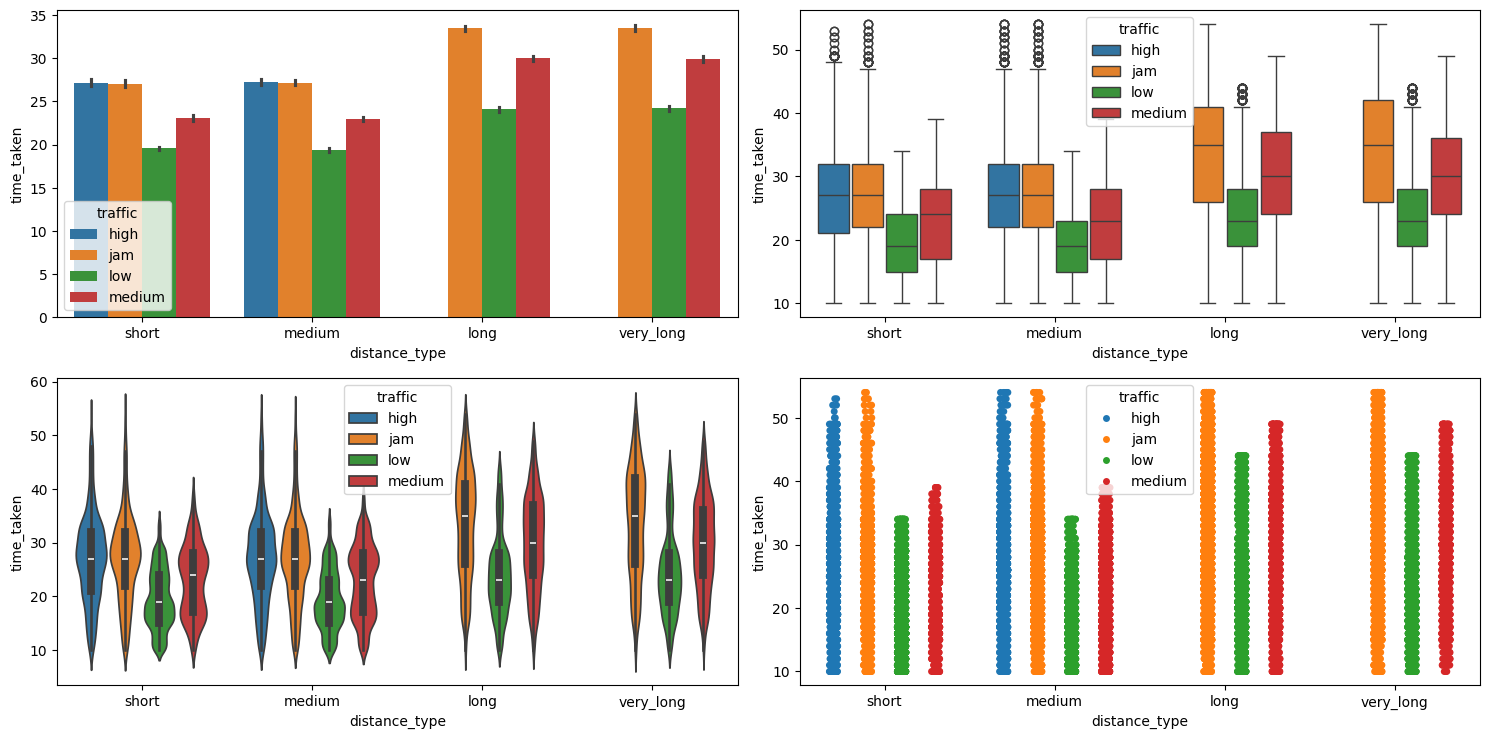

In [ ]:
multivariate_analysis(df, "time_taken", "distance_type", "traffic")